# МО "В один клик".

# Описание проекта

Онлайн-магазин «В один клик», реализующий широкий ассортимент товаров — от детских и бытовых до техники и продуктов питания, — заметил снижение покупательской активности. Эффективность привлечения новых клиентов снижается, поскольку большая часть целевой аудитории уже знакома с магазином. Поэтому для сохранения и увеличения продаж необходимо сосредоточиться на повышении активности постоянных клиентов. Руководство «В один клик», будучи современной компанией, делает ставку на анализ данных и бизнес-моделирование. Перед нашей командой стоит задача разработать и внедрить систему персонализированных предложений, ориентированную на постоянных покупателей, чтобы стимулировать их активность.

Этапы и данные.

1. Загрузка данных: ознакомление с данными.   
2. Предобработка данных. Проведем необходимую предобработку данных.   
3. Исследовательский анализ данных. Проведем исследовательский анализ данных из каждой таблицы. Отберем клиентов с покупательской активностью не менее трёх месяцев, то есть таких, которые что-либо покупали в этот период. Оформим выводы по результатам шага.   
4. Объединение таблиц. Объединим таблицы market_file.csv, market_money.csv, market_time.csv.   
5. Корреляционный анализ. Проведем корреляционный анализ признаков в количественной шкале в итоговой таблице для моделирования. Сделаем выводы о мультиколлинеарности и при необходимости устраним её.   
6. Использование пайплайнов. Создадим пайплайн для обработки данных и подбора лучшей модели и ее гиперпараметров.
7. Анализ важности признаков. Оцении важность признаков для лучшей модели и построем график важности с помощью метода SHAP. Сделаем выводы о значимости признаков.   
8. Сегментация покупателей. Выполним сегментацию покупателей. Используем результаты моделирования и данные о прибыльности покупателей. Выберим группу покупателей и предложим, как увеличить её покупательскую активность. Сделаем выводы о сегментах.   
9. Общий вывод.
Описание данных   

market_file.csv   
Таблица, которая содержит данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении.

id — номер покупателя в корпоративной базе данных.
Покупательская активность — рассчитанный класс покупательской активности (целевой признак): «снизилась» или «прежний уровень».   

Тип сервиса — уровень сервиса, например «премиум» и «стандарт».
Разрешить сообщать — информация о том, можно ли присылать покупателю дополнительные предложения о товаре. Согласие на это даёт покупатель.   

Маркет_актив_6_мес — среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев. Это значение показывает, какое число рассылок, звонков, показов рекламы и прочего приходилось на клиента.   

Маркет_актив_тек_мес — количество маркетинговых коммуникаций в текущем месяце.   

Длительность — значение, которое показывает, сколько дней прошло с момента регистрации покупателя на сайте.   

Акционные_покупки — среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев.   

Популярная_категория — самая популярная категория товаров у покупателя за последние 6 месяцев.   

Средний_просмотр_категорий_за_визит — показывает, сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца.   

Неоплаченные_продукты_штук_квартал — общее число неоплаченных товаров в корзине за последние 3 месяца.   

Ошибка_сервиса — число сбоев, которые коснулись покупателя во время посещения сайта.   

Страниц_за_визит — среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца.   

**market_money.csv**
Таблица с данными о выручке, которую получает магазин с покупателя, то есть сколько покупатель всего потратил за период взаимодействия с сайтом.
id — номер покупателя в корпоративной базе данных.
Период — название периода, во время которого зафиксирована выручка. Например, 'текущий_месяц' или 'предыдущий_месяц'.
Выручка — сумма выручки за период.

**market_time.csv**
Таблица с данными о времени (в минутах), которое покупатель провёл на сайте в течение периода.
id — номер покупателя в корпоративной базе данных.
Период — название периода, во время которого зафиксировано общее время.
минут — значение времени, проведённого на сайте, в минутах.

**money.csv**
Таблица с данными о среднемесячной прибыли покупателя за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю.
id — номер покупателя в корпоративной базе данных.
Прибыль — значение прибыли.

Установим необходимый функционал и импортируем нееобходимые библиотеки.

In [1]:
!pip install shap
!pip install phik

In [2]:
!pip install --upgrade scikit-learn==1.1.3

In [3]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st
from sklearn.model_selection import train_test_split
import math
import phik
from phik import resources, report
from phik.report import plot_correlation_matrix
import sklearn
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import shap
import scipy.stats as st
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import RandomizedSearchCV , GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import (mean_squared_error, mean_absolute_error, confusion_matrix, accuracy_score, precision_score, recall_score, r2_score, roc_auc_score)

## Загрузка данных

Загрузка данных

In [4]:
market_file = pd.read_csv('/datasets/market_file.csv')
market_money = pd.read_csv('/datasets/market_money.csv')
market_time = pd.read_csv('/datasets/market_time.csv')
money = pd.read_csv('/datasets/money.csv', sep=';', decimal=',')

Посмотрим какую информацию содержит каждая таблица. Выведем шапку каждого файла.

In [5]:
print("Данные о поведении покупателя на сайте:")
display(market_file.head())
print("\n Данные о выручке:")
display(market_money.head())
print("\n Данные о времени (в минутах), проведенном покупателем на сайте:")
display(market_time.head())
print("\n Данные о среднемесячной прибыли продавца за последние 3 месяца:")
display(money.head())

Данные о поведении покупателя на сайте:


,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандартт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандартт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2



 Данные о выручке:


,id,Период,Выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6



 Данные о времени (в минутах), проведенном покупателем на сайте:


,id,Период,минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдцщий_месяц,12
4,215350,текущий_месяц,13



 Данные о среднемесячной прибыли продавца за последние 3 месяца:


,id,Прибыль
0,215348,0.98
1,215349,4.16
2,215350,3.13
3,215351,4.87
4,215352,4.21


**Вывод**   

Данные о поведении покупателя: Данные загружены и содержат информацию о покупательской активности, типе сервиса, активности на маркете, длительности, акционных покупках, популярной категории, среднем просмотре категорий за визит, неоплаченных продуктах и ошибке сервиса.   
Данные о выручке: Данные загружены и содержат информацию о выручке за разные периоды.   
Данные о времени, проведенном на сайте: Данные загружены и содержат информацию о времени, проведенном на сайте за разные периоды.   
Данные о прибыли: Данные загружены и содержат информацию о прибыли.   
Все данные в таблицах соответствуют описанию и готовы к дальнейшему анализу.   

In [6]:
#!pip install numpy==1.23.1
#!pip install --upgrade scikit-learn==1.1.3

## Предобработка данных

Проверим есть ли в таблицах пропуски. Если есть, то их количество.

In [7]:
print("Пропущенные значения в данных market_file:")
display(market_file.isnull().sum())
print("\nПропущенные значения в данных market_money:")
display(market_money.isnull().sum())
print("\nПропущенные значения в данных market_time:")
display(market_time.isnull().sum())
print("\nПропущенные значения в данных money:")
display(money.isnull().sum())

Пропущенные значения в данных market_file:


id                                     0
Покупательская активность              0
Тип сервиса                            0
Разрешить сообщать                     0
Маркет_актив_6_мес                     0
Маркет_актив_тек_мес                   0
Длительность                           0
Акционные_покупки                      0
Популярная_категория                   0
Средний_просмотр_категорий_за_визит    0
Неоплаченные_продукты_штук_квартал     0
Ошибка_сервиса                         0
Страниц_за_визит                       0
dtype: int64


Пропущенные значения в данных market_money:


id         0
Период     0
Выручка    0
dtype: int64


Пропущенные значения в данных market_time:


id        0
Период    0
минут     0
dtype: int64


Пропущенные значения в данных money:


id         0
Прибыль    0
dtype: int64

**Отлично - пропусков нет.**

Проверим наши данные в таблицах на наличие явных дубликатов.

In [8]:
print("\nДубликаты в market_file:")
display(market_file.duplicated().sum())
print("\nДубликаты в market_money:")
display(market_money.duplicated().sum())
print("\nДубликаты в market_time:")
display(market_time.duplicated().sum())
print("\nДубликаты в money:")
display(money.duplicated().sum())


Дубликаты в market_file:


0


Дубликаты в market_money:


0


Дубликаты в market_time:


0


Дубликаты в money:


0

**Отлично - явных дубликатов нет.**

Посмотрим общую информацию об имеющихся данных.

In [9]:
print("Общая информация о данных market_file:")
market_file.info()
print("\nОбщая информация о данных market_money:")
market_money.info()
print("\nОбщая информация о данных market_time:")
market_time.info()
print("\nОбщая информация о данных money:")
money.info()

Общая информация о данных market_file:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   Покупательская активность            1300 non-null   object 
 2   Тип сервиса                          1300 non-null   object 
 3   Разрешить сообщать                   1300 non-null   object 
 4   Маркет_актив_6_мес                   1300 non-null   float64
 5   Маркет_актив_тек_мес                 1300 non-null   int64  
 6   Длительность                         1300 non-null   int64  
 7   Акционные_покупки                    1300 non-null   float64
 8   Популярная_категория                 1300 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  Неоплаченные_продукты_штук_квартал   1300 non-null   int6

**Вывод по общей информации в таблицах:**   
Для анализа доступны четыре набора данных: “market_file”, “market_money”, “market_time” и “Money”. “market_file” (1300 записей, 13 столбцов) содержит описательную информацию о клиентах, включая ‘Покупательскую активность’, ‘Тип сервиса’ и т.д. “market_money” и “market_time” (соответственно, 3900 и 2600 записей, по 3 столбца) предоставляют данные о выручке и времени, привязанные к определенным периодам. “Money” (1300 записей, 2 столбца) содержит данные о прибыли.   
Все наборы данных имеют полные наборы значений и скорее всего далее могут быть связаны по столбцу ‘id’ - это даст возможность провести комплексный анализ данных.

Выведем уникальные значения категориальных столбцов наших данных.

In [10]:
dataframes = [market_file, market_money, market_time, money]
for df in dataframes:
    for column in df.select_dtypes(include=['object']).columns:
        print(f'Уникальные значения для {column}:')
        print(df[column].unique())

Уникальные значения для Покупательская активность:
['Снизилась' 'Прежний уровень']
Уникальные значения для Тип сервиса:
['премиум' 'стандартт' 'стандарт']
Уникальные значения для Разрешить сообщать:
['да' 'нет']
Уникальные значения для Популярная_категория:
['Товары для детей' 'Домашний текстиль' 'Косметика и аксесуары'
 'Техника для красоты и здоровья' 'Кухонная посуда'
 'Мелкая бытовая техника и электроника']
Уникальные значения для Период:
['препредыдущий_месяц' 'текущий_месяц' 'предыдущий_месяц']
Уникальные значения для Период:
['текущий_месяц' 'предыдцщий_месяц']


Вижу 2 опечатки в столбцах (можно сказать неявные дубликаты):   
В данных в market_file - Тип сервиса - ошибка в стандартт;   
В данных в market_time - Период - ошибка в предыдцщий_месяц.   
Исправим ошибки и еще раз проверим уникальность значений в этих столбцах.

In [11]:
market_file['Тип сервиса'] = market_file['Тип сервиса'].replace('стандартт', 'стандарт')
print(market_file['Тип сервиса'].unique())
market_time['Период'] = market_time['Период'].replace('предыдцщий_месяц', 'предыдущий_месяц')
print(market_time['Период'].unique())

['премиум' 'стандарт']
['текущий_месяц' 'предыдущий_месяц']


Ошибки исправлены, идем дальше.

Посмотрим есть ли выбросы в наших данных. Построим графики boxplot и вычислим размах данных.

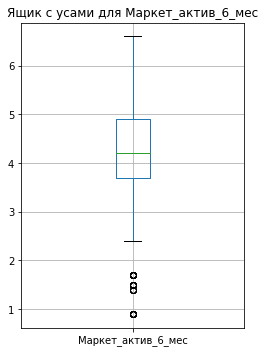

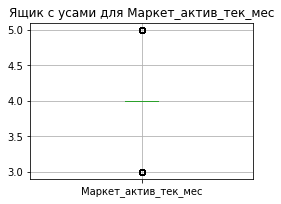

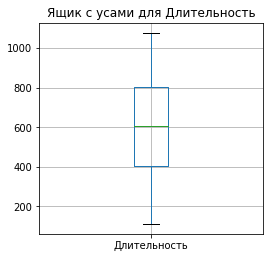

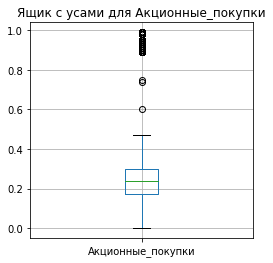

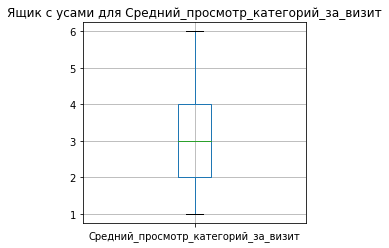

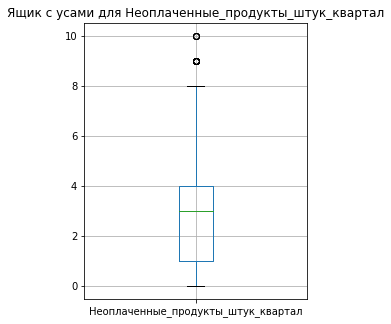

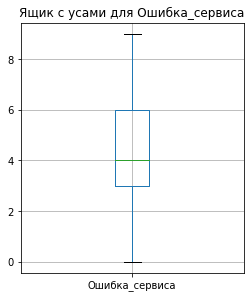

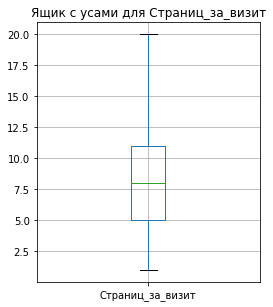

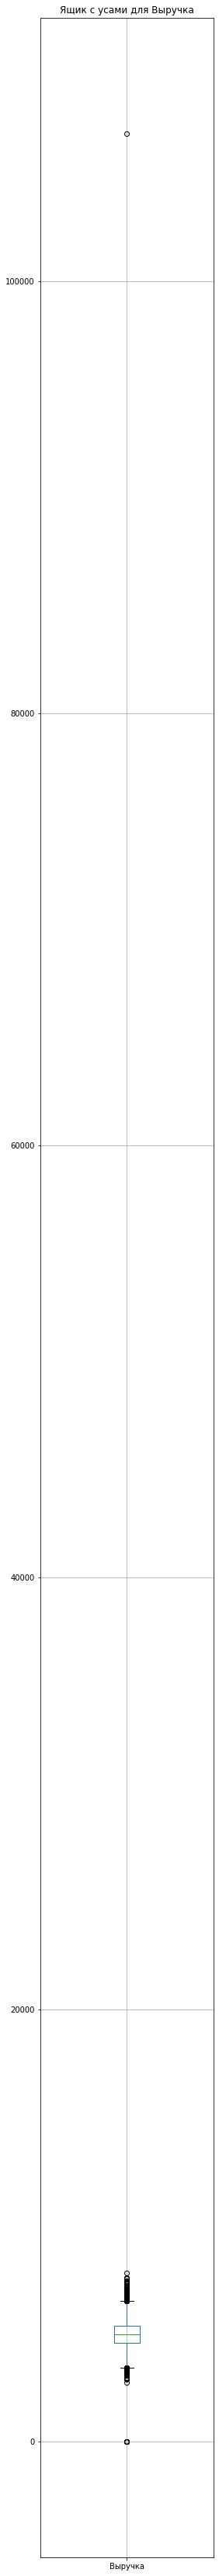

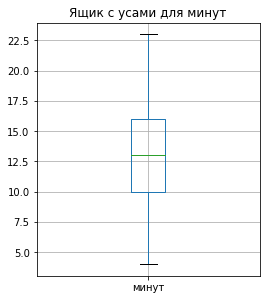

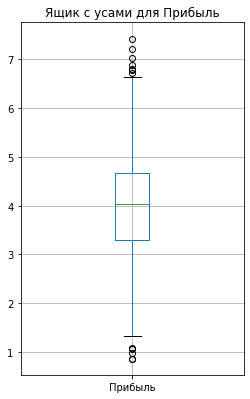

In [12]:
for df in dataframes:
    for column in df.select_dtypes(include=[np.number]).columns:
        if column != 'id':
            data_range = df[column].max() - df[column].min()
            plt.figure(figsize=(4, data_range / df[column].std()))
            df.boxplot([column])
            plt.title(f'Ящик с усами для {column}')
            plt.show()

Видим в market_money выброс в столбце Выручка > 100000.

Посмотрим какое значение в этой строке.

In [13]:
print(market_money[market_money['Выручка'] > 100000])

        id         Период   Выручка
98  215380  текущий_месяц  106862.2


Посмртрим информацию о пользователе id 215380 в каждой таблице.

In [14]:
id_value = 215380

print("Данные о поведении покупателя на сайте для id 215380:")
display(market_file[market_file['id'] == id_value])

print("\n Данные о выручке для id 215380:")
display(market_money[market_money['id'] == id_value])

print("\n Данные о времени (в минутах), проведенном покупателем на сайте для id 215380:")
display(market_time[market_time['id'] == id_value])

print("\n Данные о среднемесячной прибыли продавца за последние 3 месяца для id 215380:")
display(money[money['id'] == id_value])

Данные о поведении покупателя на сайте для id 215380:


,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
32,215380,Снизилась,премиум,нет,1.7,4,637,0.94,Техника для красоты и здоровья,3,2,4,7



 Данные о выручке для id 215380:


,id,Период,Выручка
96,215380,препредыдущий_месяц,5051.0
97,215380,предыдущий_месяц,6077.0
98,215380,текущий_месяц,106862.2



 Данные о времени (в минутах), проведенном покупателем на сайте для id 215380:


,id,Период,минут
64,215380,предыдущий_месяц,12
65,215380,текущий_месяц,14



 Данные о среднемесячной прибыли продавца за последние 3 месяца для id 215380:


,id,Прибыль
32,215380,3.88


Видим, что в данных Данные о поведении покупателя на сайте для id 215380 Покупательская активность "Снизилась", а в "текущий_месяц" Выручка во многие разы больше, чем ранее. Это говорит либо об ошибке в данных, либо о необычном поведении данного покупателя.   
Чтобы не искажать общую картину данных и не навредить обучению модели, удалим данного покупателя из всех таблиц. Это моможет сделать более целостный и точный анализ.

Удалим из всех таблиц покупателя с id 215380.

In [15]:
id_value = 215380

market_file = market_file[market_file['id'] != id_value]
market_money = market_money[market_money['id'] != id_value]
market_time = market_time[market_time['id'] != id_value]
money = money[money['id'] != id_value]

**Вывод**
В результате предобработки данные были признаны в основном корректными.   
Пропуски и явные дубликаты отсутствуют.   
Категориальные признаки подверглись очистке от опечаток (или, я бы назвала, неявных дубликатов).   
Выбросы в Выручке, превышающие порог в 100000, были удалены для минимизации влияния на статистические модели и обеспечение их надежности.

In [16]:
market_file.columns

Index(['id', 'Покупательская активность', 'Тип сервиса', 'Разрешить сообщать',
       'Маркет_актив_6_мес', 'Маркет_актив_тек_мес', 'Длительность',
       'Акционные_покупки', 'Популярная_категория',
       'Средний_просмотр_категорий_за_визит',
       'Неоплаченные_продукты_штук_квартал', 'Ошибка_сервиса',
       'Страниц_за_визит'],
      dtype='object')

In [17]:
market_money.columns

Index(['id', 'Период', 'Выручка'], dtype='object')

In [18]:
market_time.columns

Index(['id', 'Период', 'минут'], dtype='object')

In [19]:
money.columns

Index(['id', 'Прибыль'], dtype='object')

Посмотрим, что получилось.

In [20]:
def to_snake_case(name):
  """Преобразует строку в snake_case."""
  import re
  s1 = re.sub('(.)([A-Z][a-z]+)', r'\1_\2', name)
  return re.sub('([a-z0-9])([A-Z])', r'\1_\2', s1).lower()

market_file.columns = [to_snake_case(col) for col in market_file.columns]
market_money.columns = [to_snake_case(col) for col in market_money.columns]
market_time.columns = [to_snake_case(col) for col in market_time.columns]
money.columns = [to_snake_case(col) for col in money.columns]

print("market_file.columns:", market_file.columns)
print("market_money.columns:", market_money.columns)
print("market_time.columns:", market_time.columns)
print("money.columns:", money.columns)

market_file.columns: Index(['id', 'покупательская активность', 'тип сервиса', 'разрешить сообщать',
       'маркет_актив_6_мес', 'маркет_актив_тек_мес', 'длительность',
       'акционные_покупки', 'популярная_категория',
       'средний_просмотр_категорий_за_визит',
       'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса',
       'страниц_за_визит'],
      dtype='object')
market_money.columns: Index(['id', 'период', 'выручка'], dtype='object')
market_time.columns: Index(['id', 'период', 'минут'], dtype='object')
money.columns: Index(['id', 'прибыль'], dtype='object')


Есть несколько колонок, которые необходимо скорректировать по названию.

In [21]:
market_file.rename(columns={'покупательская активность':'покупательская_активность', 'тип сервиса':'тип_сервиса', 'разрешить сообщать':'разрешить_сообщать'})

,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,216643,Прежний уровень,стандарт,да,6.6,3,318,0.24,Техника для красоты и здоровья,5,3,3,11
1296,216644,Прежний уровень,стандарт,нет,5.1,4,454,0.21,Домашний текстиль,6,2,3,9
1297,216645,Прежний уровень,стандарт,да,4.1,3,586,0.20,Домашний текстиль,3,2,5,7
1298,216646,Прежний уровень,стандарт,да,6.3,5,645,0.12,Техника для красоты и здоровья,3,3,5,7


3 колонки ('покупательская активность', 'тип сервиса', 'разрешить сообщать') остались чуть в другом виде. Оставляем так как есть.

## Исследовательский анализ данных

Проведем исследовательский анализ тех данных, которые мы имеем. Ранее, мы строили ящик с усами для выявления выбросов в предобработке данных. Теперь изучим данные более тщательно.

Еще раз выведем информацию по каждой таблице - для удобства работы с данными.

In [22]:
print("Данные о поведении покупателя на сайте:")
display(market_file.head())
print("\n Данные о выручке:")
display(market_money.head())
print("\n Данные о времени (в минутах), проведенном покупателем на сайте:")
display(market_time.head())
print("\n Данные о среднемесячной прибыли продавца за последние 3 месяца:")
display(money.head())

Данные о поведении покупателя на сайте:


,id,покупательская активность,тип сервиса,разрешить сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2



 Данные о выручке:


,id,период,выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6



 Данные о времени (в минутах), проведенном покупателем на сайте:


,id,период,минут
0,215348,текущий_месяц,14
1,215348,предыдущий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдущий_месяц,12
4,215350,текущий_месяц,13



 Данные о среднемесячной прибыли продавца за последние 3 месяца:


,id,прибыль
0,215348,0.98
1,215349,4.16
2,215350,3.13
3,215351,4.87
4,215352,4.21


**Сначала изучим market_file.csv   
Таблица, которая содержит данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении.**

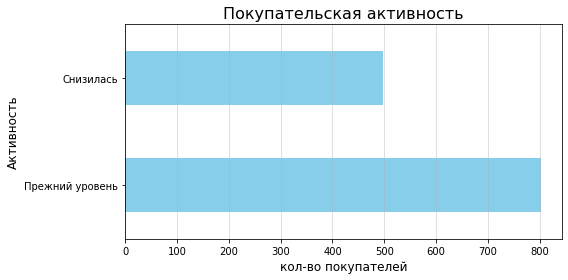

In [23]:
plt.figure(figsize=(8, 4))
market_file['покупательская активность'].value_counts().plot(kind='barh', color='skyblue')

plt.title('Покупательская активность', fontsize=16)
plt.xlabel('кол-во покупателей', fontsize=12)
plt.ylabel('Активность', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='x', alpha=0.5)

plt.tight_layout()
plt.show()

Хотя основная часть клиентской базы сохраняет прежний уровень покупательской активности, стоит обратить внимание на заметную долю клиентов, чья активность снизилась.

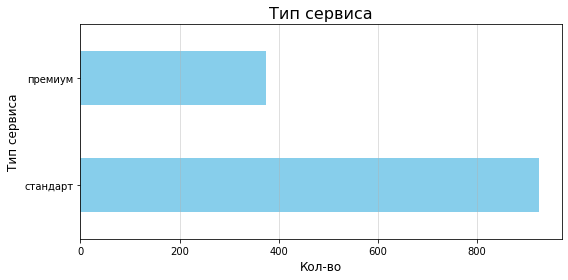

In [24]:
plt.figure(figsize=(8, 4))
market_file['тип сервиса'].value_counts().plot(kind='barh', color='skyblue')

plt.title('Тип сервиса', fontsize=16)
plt.xlabel('Кол-во', fontsize=12)
plt.ylabel('Тип сервиса', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='x', alpha=0.5)

plt.tight_layout()
plt.show()

Стандартный тип сервиса более популярен среди клиентов.

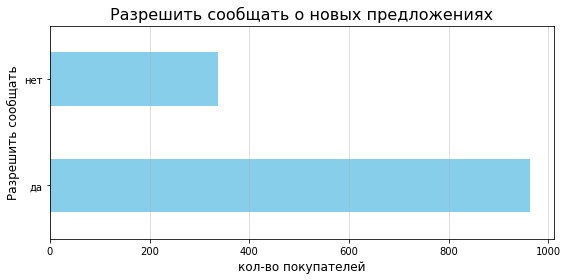

In [25]:
plt.figure(figsize=(8, 4))
market_file['разрешить сообщать'].value_counts().plot(kind='barh', color='skyblue')

plt.title('Разрешить сообщать о новых предложениях', fontsize=16)
plt.xlabel('кол-во покупателей', fontsize=12)
plt.ylabel('Разрешить сообщать', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='x', alpha=0.5)

plt.tight_layout()
plt.show()

Видим, что достаточно много людей готовы получать рекламные рассылки о новых предложениях магазина своим клиентам.

Посмотрим информацию о числе рассылок, звонков, показов рекламы и прочего, что приходилось на клиента за последний месяц.

In [26]:
market_file['маркет_актив_тек_мес'].describe()

count    1299.000000
mean        4.011547
std         0.697136
min         3.000000
25%         4.000000
50%         4.000000
75%         4.000000
max         5.000000
Name: маркет_актив_тек_мес, dtype: float64

Видим, что за последний месяц на клиента приходилось около 4 активностей от компании. Максимально около 5 активностей. Минимально 3.

Для наглядности построим гистограмму и боксплот.

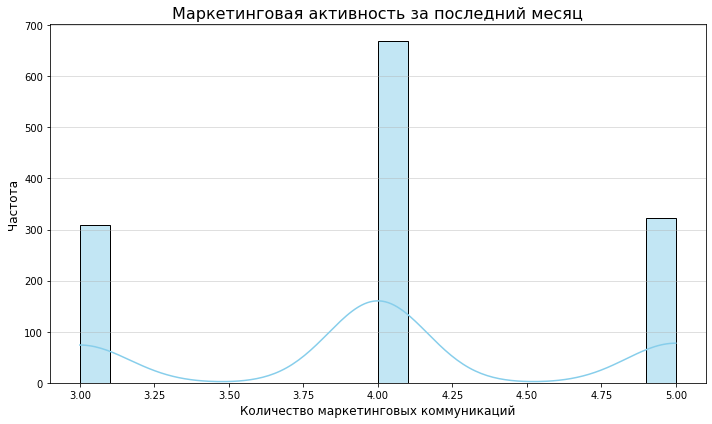

In [27]:
plt.figure(figsize=(10, 6))
sns.histplot(market_file['маркет_актив_тек_мес'], bins=20, color='skyblue', kde=True, edgecolor='black')

plt.title('Маркетинговая активность за последний месяц', fontsize=16)
plt.ylabel('Частота', fontsize=12)
plt.xlabel('Количество маркетинговых коммуникаций', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', alpha=0.5)
plt.tight_layout()
plt.show()

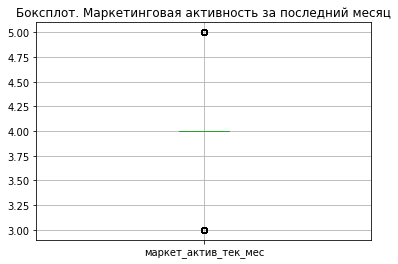

In [28]:
market_file.boxplot(column='маркет_актив_тек_мес')
plt.title('Боксплот. Маркетинговая активность за последний месяц')
plt.show()

Частота маркетинговых коммуникаций за последние 6 месяцев лежит в основном в районе 4 коммуникаций с клиентом.

Посмотрим информацию о числе рассылок, звонков, показов рекламы и прочего, что приходилось на клиента за последние 6 месяцев.

In [29]:
market_file['маркет_актив_6_мес'].describe()

count    1299.000000
mean        4.255735
std         1.012725
min         0.900000
25%         3.700000
50%         4.200000
75%         4.900000
max         6.600000
Name: маркет_актив_6_мес, dtype: float64

Видим, что за последний месяц на клиента в среднем приходилось около 4 активностей от компании. Максимально около 6-7 активностей. Минимально 1 и, видимо , иногда 0. Возможно из-за тех, кто не хочет получать рекламу.

Для наглядности построим гистограмму и боксплот.

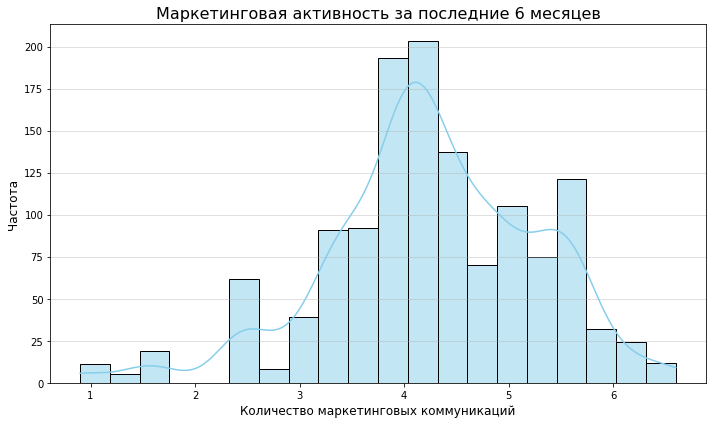

In [30]:
plt.figure(figsize=(10, 6))
sns.histplot(market_file['маркет_актив_6_мес'], bins=20, color='skyblue', kde=True, edgecolor='black')

plt.title('Маркетинговая активность за последние 6 месяцев', fontsize=16)
plt.ylabel('Частота', fontsize=12)
plt.xlabel('Количество маркетинговых коммуникаций', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', alpha=0.5)
plt.tight_layout()
plt.show()

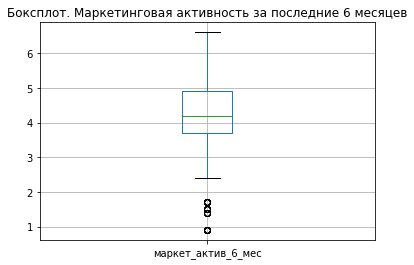

In [31]:
market_file.boxplot(column='маркет_актив_6_мес')
plt.title('Боксплот. Маркетинговая активность за последние 6 месяцев')
plt.show()

Частота маркетинговых коммуникаций за последние 6 месяцев лежит в основном в диапазоне от 3.7 до 4.9. ВЫбросы не рассматриваем, они не повлияют на качество данных.

Рассмотрим подробнее длительность дней пребывания клиента на сайте.

In [32]:
market_file['длительность'].describe()

count    1299.000000
mean      601.871440
std       249.950617
min       110.000000
25%       405.000000
50%       606.000000
75%       806.000000
max      1079.000000
Name: длительность, dtype: float64

Видим, что в среднем, клиенты интернет-магазина «В один клик» зарегистрированы на сайте около 600 дней, т.е. основа клиентов те, кто уже более 2-х лет работают с компанией. Дольше всех есть зарегистрированные клиенты уже около 3-х лет. А самый маленький срок регистрации чуть больше 100 дней или менее 1 года.

Для наглядности построим гистограмму и боксплот.

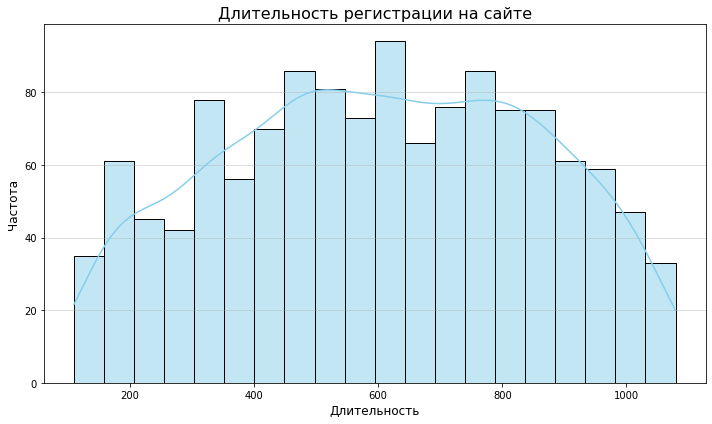

In [33]:
plt.figure(figsize=(10, 6))
sns.histplot(market_file['длительность'], bins=20, color='skyblue', kde=True, edgecolor='black')

plt.title('Длительность регистрации на сайте', fontsize=16)
plt.ylabel('Частота', fontsize=12)
plt.xlabel('Длительность', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', alpha=0.5)
plt.tight_layout()
plt.show()

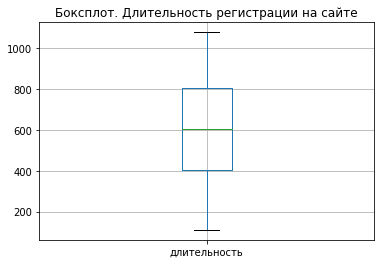

In [34]:
market_file.boxplot(column='длительность')
plt.title('Боксплот. Длительность регистрации на сайте')
plt.show()

В основном, длительность нахождения на сайте лежит в диапозоне от 400 до 800 дней.

Рассмотрим среднемесячную долю покупок по акции от общего числа покупок за последние 6 месяцев.

In [35]:
market_file['акционные_покупки'].describe()

count    1299.000000
mean        0.319330
std         0.249345
min         0.000000
25%         0.170000
50%         0.240000
75%         0.300000
max         0.990000
Name: акционные_покупки, dtype: float64

В среднем для большинства клиентов доля акционных покупок находится около 32% от общего числа покупок.

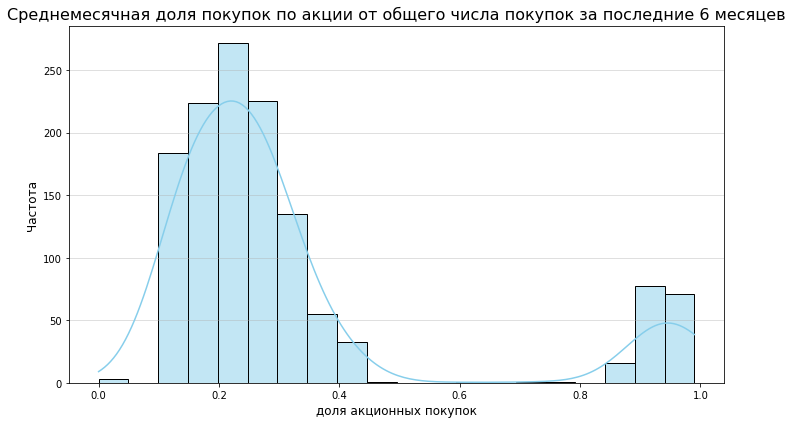

In [36]:
plt.figure(figsize=(10, 6))
sns.histplot(market_file['акционные_покупки'], bins=20, color='skyblue', kde=True, edgecolor='black')

plt.title('Среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев', fontsize=16)
plt.ylabel('Частота', fontsize=12)
plt.xlabel('доля акционных покупок', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', alpha=0.5)
plt.tight_layout()
plt.show()

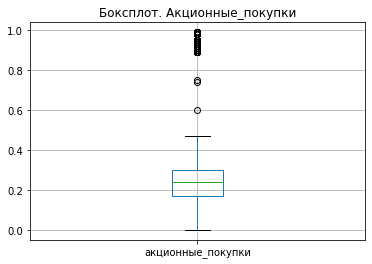

In [37]:
market_file.boxplot(column='акционные_покупки')
plt.title('Боксплот. Акционные_покупки')
plt.show()

Исходя из всех данных выше, делаем вывод, что для большинства клиентов интернет-магазина доля покупок по акции от общего количества покупок составляет от 17% до 30%. Остальные клиенты, чей % доли акционных покупок выше этого диапазона - выбросы - те клиенты, которые в основном стараются покупать только по акции.

Рассмотрим самую популярную категорию товаров у покупателя за последние 6 месяцев.

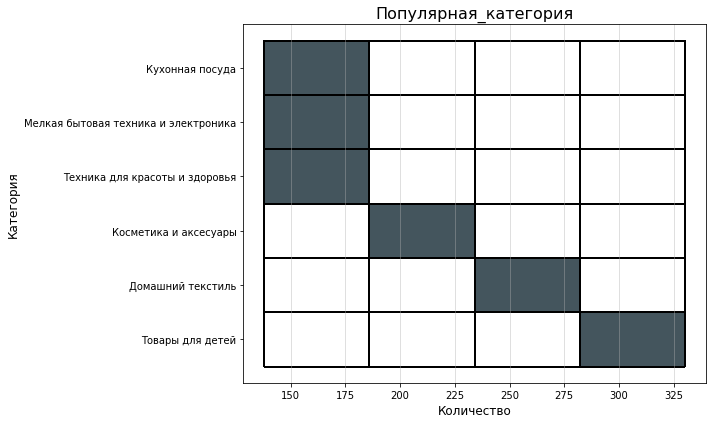

In [38]:
plt.figure(figsize=(10, 6))
sns.histplot(y=market_file['популярная_категория'].value_counts().sort_values().index,
             x=market_file['популярная_категория'].value_counts().sort_values().values,
              color='skyblue', edgecolor='black')

plt.title('Популярная_категория', fontsize=16)
plt.ylabel('Категория', fontsize=12)
plt.xlabel('Количество', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='x', alpha=0.5)
plt.tight_layout()
plt.show()

Среди популярных категорий: первое место - товары для детей, второе - домашний текстиль, третье - косметика и аксесуары, четвертое - техника для красоты и здоровья, пятое - мелкая бытовая техника и электроника, шестое - кухонная посуда.

Рассмотрим более подробно сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца.

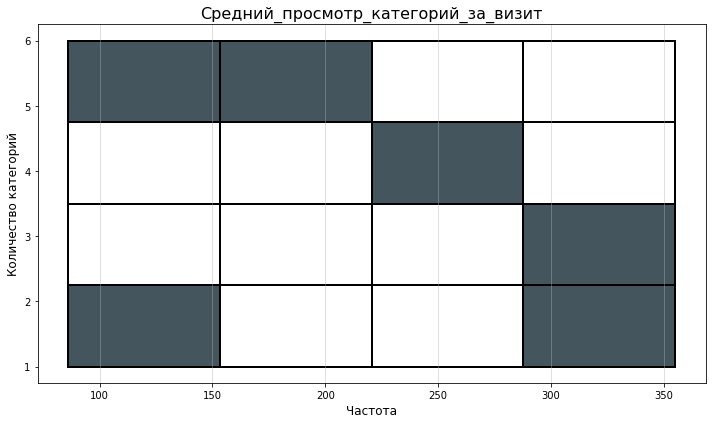

In [39]:
plt.figure(figsize=(10, 6))
sns.histplot(y=market_file['средний_просмотр_категорий_за_визит'].value_counts().sort_values().index,
             x=market_file['средний_просмотр_категорий_за_визит'].value_counts().sort_values().values,
              color='skyblue', edgecolor='black')

plt.title('Средний_просмотр_категорий_за_визит', fontsize=16)
plt.ylabel('Количество категорий', fontsize=12)
plt.xlabel('Частота', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='x', alpha=0.5)
plt.tight_layout()
plt.show()

В основном, кол-во просмотренных категорий за визит: чаще всего - 3 просмотренных категории, далее 2 категории, далее 4 категории за визит, и реже всего одна и шесть категорий за визит.

Рассмотрим более подробно общее число неоплаченных товаров в корзине за последние 3 месяца.

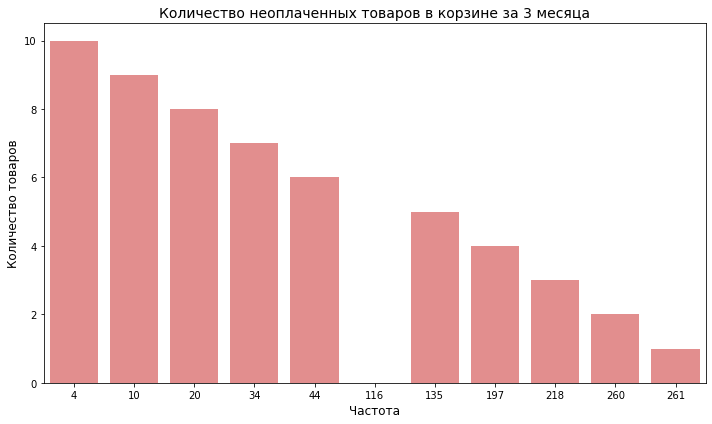

In [40]:
plt.figure(figsize=(10, 6))
sns.barplot(y=market_file['неоплаченные_продукты_штук_квартал'].value_counts().sort_values().index,
            x=market_file['неоплаченные_продукты_штук_квартал'].value_counts().sort_values().values,
            color='lightcoral')


plt.title('Количество неоплаченных товаров в корзине за 3 месяца', fontsize=14)
plt.xlabel('Частота', fontsize=12)
plt.ylabel('Количество товаров', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

Чаще всего в корзине за 3 месяца остаётся 1 или 2 неоплаченных товара. Затем идут 3-4, потом 5 товаров. Бывают случаи, когда товаров 0, но это случается реже, чем 1-2. Все остальные количества встречаются намного реже.

Рассмотрим более подробно число сбоев, которые коснулись покупателя во время посещения сайта.

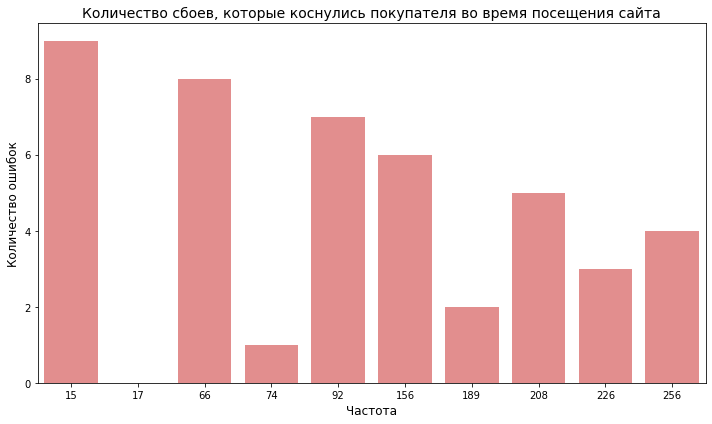

In [41]:
plt.figure(figsize=(10, 6))
sns.barplot(y=market_file['ошибка_сервиса'].value_counts().sort_values().index,
            x=market_file['ошибка_сервиса'].value_counts().sort_values().values,
            color='lightcoral')


plt.title('Количество сбоев, которые коснулись покупателя во время посещения сайта', fontsize=14)
plt.xlabel('Частота', fontsize=12)
plt.ylabel('Количество ошибок', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

Чаще всего клиенты сталкиваются, примерно с 4 сбоями на сайте. Стоит отметить, что судя по графику, сбои на сайте это регулярная проблема пользователей. меньше всего 0 и 9 сбоев.

Рассмотрим более подробно сколько в среднем страниц, просмотрел покупатель за один визит на сайт за последние 3 месяца.

In [42]:
market_file['страниц_за_визит'].describe()

count    1299.000000
mean        8.177829
std         3.979524
min         1.000000
25%         5.000000
50%         8.000000
75%        11.000000
max        20.000000
Name: страниц_за_визит, dtype: float64

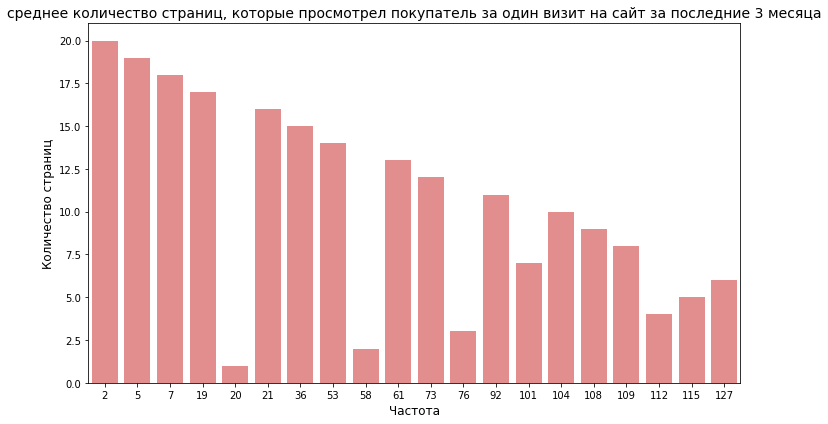

In [43]:
plt.figure(figsize=(10, 6))
sns.barplot(y=market_file['страниц_за_визит'].value_counts().sort_values().index,
            x=market_file['страниц_за_визит'].value_counts().sort_values().values,
            color='lightcoral')


plt.title('среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца', fontsize=14)
plt.xlabel('Частота', fontsize=12)
plt.ylabel('Количество страниц', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

Данные за 3 месяца показывают, что пик количества просмотренных страниц за один визит приходится на диапазон примерно от 4 до 11. Просмотр одной страницы и просмотр 16+ страниц происходят довольно редко.

**Теперь изучим market_money.csv   
Таблица с данными о выручке, которую получает магазин с покупателя, то есть сколько покупатель всего потратил за период взаимодействия с сайтом.**

In [44]:
market_money.head()

,id,период,выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6


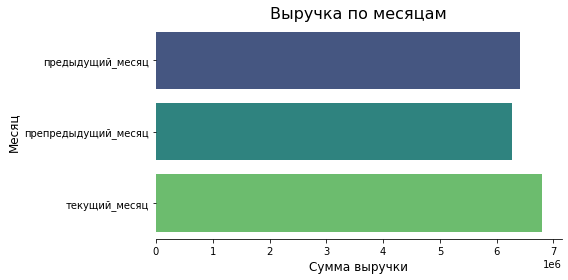

In [45]:
plt.figure(figsize=(8, 4))
sns.barplot(y=market_money.pivot_table(index='период', values='выручка', aggfunc='sum').index,
            x=market_money.pivot_table(index='период', values='выручка', aggfunc='sum')['выручка'],
             palette='viridis')

plt.title('Выручка по месяцам', fontsize=16)
plt.xlabel('Сумма выручки', fontsize=12)
plt.ylabel('Месяц', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
sns.despine(left=True)
plt.tight_layout()
plt.show()

Исходя из графика, можем увидеть, что в течение 3-х последних месяцев, ежемесячно, выручка интернет-магазина растет.

**Далее изучим market_time.csv   
Таблица с данными о времени (в минутах), которое покупатель провёл на сайте в течение периода.**

In [46]:
market_time.head()

,id,период,минут
0,215348,текущий_месяц,14
1,215348,предыдущий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдущий_месяц,12
4,215350,текущий_месяц,13


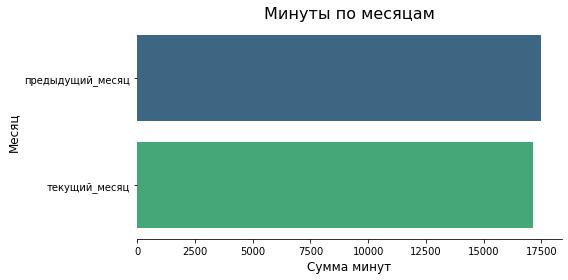

In [47]:
plt.figure(figsize=(8, 4))
sns.barplot(y=market_time.pivot_table(index='период', values='минут', aggfunc='sum').index,
            x=market_time.pivot_table(index='период', values='минут', aggfunc='sum')['минут'],
            palette='viridis')

plt.title('Минуты по месяцам', fontsize=16)
plt.xlabel('Сумма минут', fontsize=12)
plt.ylabel('Месяц', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
sns.despine(left=True)
plt.tight_layout()
plt.show()

В текущем месяце время в минутах, проведенное клиентами интернет-магазина на сайте незначительно уменьшилось. В целом все примерно так же.

**Далее изучим money.csv   
Таблица с данными о среднемесячной прибыли продавца за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю.**

In [48]:
money.head()

,id,прибыль
0,215348,0.98
1,215349,4.16
2,215350,3.13
3,215351,4.87
4,215352,4.21


Выведем информацию о прибыли и сразу построим графики для визуализации и более полного описания.

In [49]:
money['прибыль'].describe()

count    1299.000000
mean        3.996721
std         1.014107
min         0.860000
25%         3.300000
50%         4.050000
75%         4.670000
max         7.430000
Name: прибыль, dtype: float64

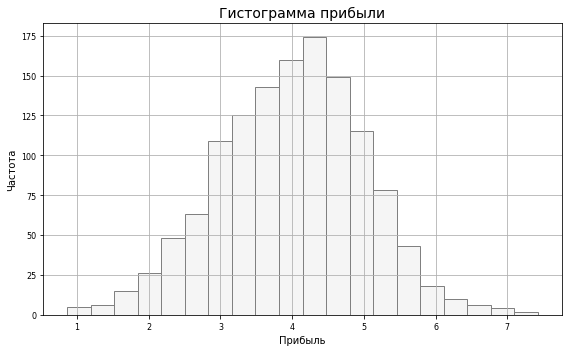

In [50]:
plt.figure(figsize=(8, 5))
money['прибыль'].hist(bins=20, color='whitesmoke', edgecolor='gray')

plt.title('Гистограмма прибыли', fontsize=14)
plt.xlabel('Прибыль', fontsize=10)
plt.ylabel('Частота', fontsize=10)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.tight_layout()
plt.show()

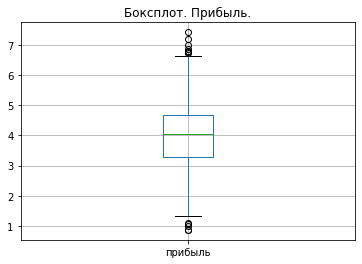

In [51]:
money.boxplot(column='прибыль')
plt.title('Боксплот. Прибыль.')
plt.show()

Хотя в большинстве случаев прибыль находится в диапазоне от 3,3 до 4,7, диаграмма размаха показывает наличие выбросов, что указывает на неоднородность клиентской базы с точки зрения прибыльности: от очень прибыльных клиентов до неприбыльных.

Для продолжения исследования необходимо выполниьть условие - отобрать только тех, клиентов, кто делал покупки зпоследние 3 месяца.

Сделаем сводную таблицу по выручке по периодам.

In [52]:
market_money_pivot = market_money.pivot_table(index='id',columns='период', values='выручка', aggfunc='sum')
market_money_pivot.head()

период,предыдущий_месяц,препредыдущий_месяц,текущий_месяц
id,,,
215348,0.0,0.0,3293.1
215349,5216.0,4472.0,4971.6
215350,5457.5,4826.0,5058.4
215351,6158.0,4793.0,6610.4
215352,5807.5,4594.0,5872.5


Отфильтруем клиентов, которые подходят под условие описанное выше.

In [53]:
clients_with_drop = market_money_pivot[(market_money_pivot['предыдущий_месяц']!= 0)&
                                 (market_money_pivot['препредыдущий_месяц']!= 0)&
                                 (market_money_pivot['текущий_месяц']!= 0)].index.to_list()

Применим фильтрацию ко всем таблицам.

In [54]:
market_file = market_file[market_file['id'].isin(clients_with_drop)]
market_money = market_money[market_money['id'].isin(clients_with_drop)]
market_time = market_time[market_time['id'].isin(clients_with_drop)]
money = money[money['id'].isin(clients_with_drop)]

Проверим размер market_file.

In [55]:
market_file.shape

(1296, 13)

Получается, мы исключили всего 4-х клиентов, которые не подходят под наши условия.

**Вывод**   

Общие характеристики клиентов и их активности:

Большинство клиентов сохраняют прежний уровень покупательской активности, однако значительная часть демонстрирует снижение.   
Стандартный тип сервиса является наиболее востребованным среди клиентов.   
Клиенты в основном охотно соглашаются на получение рассылок.   
Продолжительность пребывания клиентов на сайте в большинстве случаев составляет от 400 до 800 дней.   
Для большинства клиентов доля покупок по акциям составляет от 17% до 30%. При этом выделяется группа клиентов, которые почти все свои покупки совершают по акционным предложениям.   
Чаще всего встречается ситуация, когда в корзине за 3 месяца остаётся 1-2 неоплаченных товара. Далее по частоте идут 3 и 4 товара, затем 5 и 0. Остальные значения встречаются довольно редко.   
Клиенты в большинстве случаев сталкиваются с 4 сбоями на сайте. Стоит отметить, что как полное отсутствие сбоев, так и 9 сбоев — довольно редкие явления. Таким образом, наличие сбоев является обычным явлением для многих клиентов.   
В большинстве случаев клиенты просматривают от 4 до 11 страниц за один визит. Просмотр одной страницы или 16 и более страниц — относительно редкое явление.   

Маркетинговые коммуникации и активность:   

Количество маркетинговых коммуникаций в основном находится в диапазоне от 3,7 до 4,9. На диаграмме размаха (боксплоте) наблюдаются 4 выброса в нижней части графика, однако они не повлияют на данное исследование.   
В текущем месяце, как и за последние 6 месяцев чаще всего маркетинговая активность выражается примерно в 4 коммуникациях с клиентом.   

Популярные категории и просмотры:   

Самыми популярными категориями являются: товары для детей (первое место), домашний текстиль (второе место), косметика и аксессуары (третье место), техника для красоты и здоровья (четвертое место), а также мелкая бытовая техника и электроника (пятое место) и шестое - кухонная посуда.
В среднем за один визит клиенты чаще всего просматривают 3 категории товаров. Затем следуют 2 просмотренные категории, потом 4 категории, а реже всего — 1 или 6 категорий.   

Финансовые показатели:   

Наблюдается положительная динамика выручки в течение последних месяцев.   
Время, проведенное пользователями на сайте, незначительно сократилось в текущем месяце.   
Большая часть значений прибыли находится в диапазоне от 3,3 до 4,7. Наличие выбросов на диаграмме размаха (боксплоте) указывает на присутствие как клиентов с очень высокой прибылью, так и клиентов с низкой прибылью.   

Критерий отбора данных для дальнейшего анализа:   

Для дальнейшего исследования были отобраны только те клиенты, которые совершали покупки в течение последних 3 месяцев.

## Объединение таблиц

Для дальнейшей работы нам необходимо объединить таблицы. Предварительно создим новые столбцы: в таблице с минутами market_time - 'минуты_предыдущий_месяц' и 'минуты_текущий_месяц', в таблице с выручкой market_money - 'выручка_предыдущий_месяц', 'выручка_препредыдущий_месяц' и 'выручка_текущий_месяц'.

In [56]:
time_pivot = market_time.pivot_table(index=['id'],columns=['период'],values=['минут'])
time_pivot.columns = ['минуты_предыдущий_месяц','минуты_текущий_месяц']
time_pivot = time_pivot.reset_index()
time_pivot.head()

,id,минуты_предыдущий_месяц,минуты_текущий_месяц
0,215349,12,10
1,215350,8,13
2,215351,11,13
3,215352,8,11
4,215353,10,10


In [57]:
money_pivot = market_money.pivot_table(index=['id'],columns=['период'],values=['выручка'])
money_pivot.columns = ['выручка_предыдущий_месяц','выручка_препредыдущий_месяц','выручка_текущий_месяц']
money_pivot = money_pivot.reset_index()
money_pivot.head()

,id,выручка_предыдущий_месяц,выручка_препредыдущий_месяц,выручка_текущий_месяц
0,215349,5216.0,4472.0,4971.6
1,215350,5457.5,4826.0,5058.4
2,215351,6158.0,4793.0,6610.4
3,215352,5807.5,4594.0,5872.5
4,215353,4738.5,5124.0,5388.5


Преобразуем данные.

In [58]:
market_time = market_time.pivot(index='id', columns='период', values='минут')
market_time.columns = ['минут_' + str(col) for col in market_time.columns]

display(market_time)

,минут_предыдущий_месяц,минут_текущий_месяц
id,,
215349,12,10
215350,8,13
215351,11,13
215352,8,11
215353,10,10
...,...,...
216643,14,7
216644,12,11
216645,12,18


Объединим 3 таблицы по столбцу id.

In [59]:
market_file.reset_index(inplace=True,drop=True)
time_pivot.reset_index(inplace=True,drop=True)
money_pivot.reset_index(inplace=True,drop=True)
data = market_file.merge(time_pivot, on='id',how='inner').merge(money_pivot, on='id', how='inner')
data.head()

,id,покупательская активность,тип сервиса,разрешить сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,минуты_предыдущий_месяц,минуты_текущий_месяц,выручка_предыдущий_месяц,выручка_препредыдущий_месяц,выручка_текущий_месяц
0,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,12,10,5216.0,4472.0,4971.6
1,215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,8,13,5457.5,4826.0,5058.4
2,215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,11,13,6158.0,4793.0,6610.4
3,215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,8,11,5807.5,4594.0,5872.5
4,215353,Снизилась,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4,10,10,4738.5,5124.0,5388.5


Проверим размер, тип данных, пропуски и дубликаты в получившейся объединенной таблице.

In [60]:
# Проверка на пропущенные значения
print("Пропущенные значения в данных market_file:")
display(data.isnull().sum())
# Проверка на дубликаты
print("\nДубликаты в данных market_file:")
display(data.duplicated().sum())
print("Общая информация о данных market_file:")
data.info()
# Проверка размерности
print("Размерность market_file:")
data.shape

Пропущенные значения в данных market_file:


id                                     0
покупательская активность              0
тип сервиса                            0
разрешить сообщать                     0
маркет_актив_6_мес                     0
маркет_актив_тек_мес                   0
длительность                           0
акционные_покупки                      0
популярная_категория                   0
средний_просмотр_категорий_за_визит    0
неоплаченные_продукты_штук_квартал     0
ошибка_сервиса                         0
страниц_за_визит                       0
минуты_предыдущий_месяц                0
минуты_текущий_месяц                   0
выручка_предыдущий_месяц               0
выручка_препредыдущий_месяц            0
выручка_текущий_месяц                  0
dtype: int64


Дубликаты в данных market_file:


0

Общая информация о данных market_file:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296 entries, 0 to 1295
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1296 non-null   int64  
 1   покупательская активность            1296 non-null   object 
 2   тип сервиса                          1296 non-null   object 
 3   разрешить сообщать                   1296 non-null   object 
 4   маркет_актив_6_мес                   1296 non-null   float64
 5   маркет_актив_тек_мес                 1296 non-null   int64  
 6   длительность                         1296 non-null   int64  
 7   акционные_покупки                    1296 non-null   float64
 8   популярная_категория                 1296 non-null   object 
 9   средний_просмотр_категорий_за_визит  1296 non-null   int64  
 10  неоплаченные_продукты_штук_квартал   1296 non-null   int6

(1296, 18)

**Вывод**

После объединения таблиц была проведена проверка, которая подтвердила корректность операции. Итоговая таблица имеет нужный размер, правильные типы данных и не содержит пропущенных значений или дубликатов.

## Корреляционный анализ

Для начала посмотрим, как коррелирует столбец "Покупательская активность" с другими столбцами.

interval columns not set, guessing: ['маркет_актив_6_мес', 'маркет_актив_тек_мес', 'длительность', 'акционные_покупки', 'средний_просмотр_категорий_за_визит', 'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса', 'страниц_за_визит', 'минуты_предыдущий_месяц', 'минуты_текущий_месяц', 'выручка_предыдущий_месяц', 'выручка_препредыдущий_месяц', 'выручка_текущий_месяц']


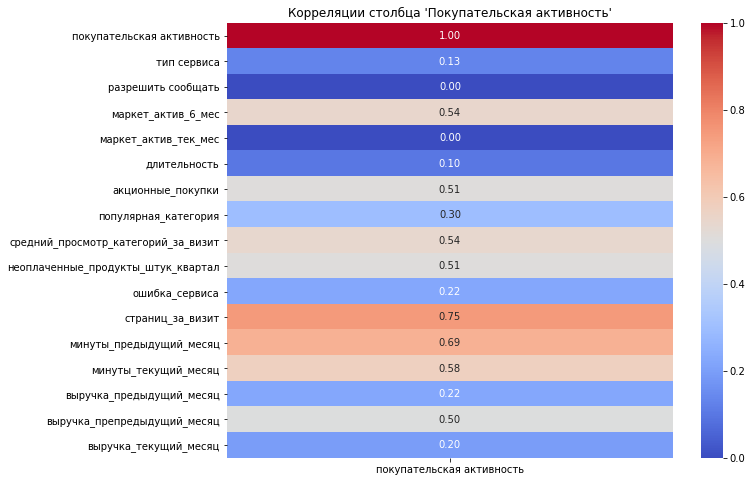

In [61]:
id_column = None
if 'id' in data.columns:
    id_column = data['id'].copy()
    data = data.drop('id', axis=1)

phik_matrix = data.phik_matrix()

if id_column is not None:
    data['id'] = id_column
    
plt.figure(figsize=(10, 8))
sns.heatmap(phik_matrix[["покупательская активность"]], annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Корреляции столбца 'Покупательская активность'")
plt.show()

Несмотря на очень высокую корреляцию между столбцом id и покупательской активностью, это не означает, что между ними существует причинно-следственная связь. Скорее всего, это просто случайное совпадение, и в дальнейшем анализе этот столбец можно исключить. Логично, что столбец id показывает ложную корреляционную связь со столбцом Покупательская активность.

Удалим столбец id.

In [62]:
#data_without_id = data.drop('id', axis=1)

Вычислим матрицу корреляции для данных без id.

interval columns not set, guessing: ['маркет_актив_6_мес', 'маркет_актив_тек_мес', 'длительность', 'акционные_покупки', 'средний_просмотр_категорий_за_визит', 'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса', 'страниц_за_визит', 'минуты_предыдущий_месяц', 'минуты_текущий_месяц', 'выручка_предыдущий_месяц', 'выручка_препредыдущий_месяц', 'выручка_текущий_месяц']


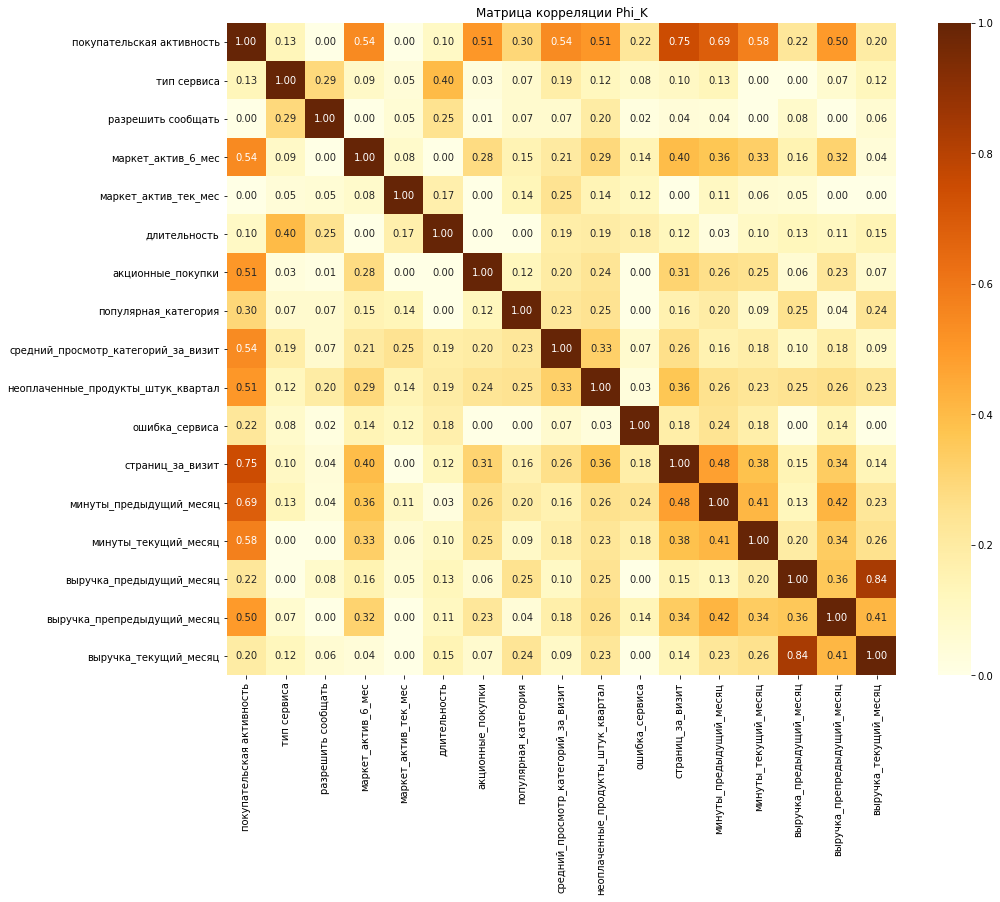

In [63]:
id_column = None
if 'id' in data.columns:
    id_column = data['id'].copy()
    data = data.drop('id', axis=1)

phik_matrix = data.phik_matrix()

if id_column is not None:
    data['id'] = id_column

plt.figure(figsize=(15, 12))
sns.heatmap(phik_matrix, annot=True, fmt=".2f", cmap='YlOrBr')
plt.title("Матрица корреляции Phi_K")
plt.show()

***Вывод по корреляционному анализу Покупательской активности с другими столбцами: *** 

Целевой переменной в нашем анализе является покупательская активность, которую мы стремимся спрогнозировать, опираясь на значения других признаков.
    
Столбцы «Разрешить сообщать» и «Маркет_актив_тек_мес» показывают нулевую корреляцию с покупательской активностью. Это позволяет предположить, что эти признаки не связаны с покупательским поведением клиентов и не оказывают на него никакого влияния.

Столбцы Тип сервиса (0,13), Длительность (0,10), Популярная_категория (0,30), Ошибка_сервиса (0,22), Выручка_за_препредыдущий_месяц (0,50), Выручка_за_предыдущий_месяц (0,22), Выручка_за_текущий_месяц (0,20) имеют слабую положительную корреляцию с покупательской активностью. Это может говорить о том, что влияние этих признаков на решение о покупке невелико или зависит от других, неучтенных факторов.

Признаки Маркет_актив_6_мес (0,54), Акционные_покупки (0,51), Средний_просмотр_категорий_за_визит (0,54), Неоплаченные_продукты_штук_квартал (0,51) демонстрируют умеренную положительную корреляцию с покупательской активностью, так же больше всех корреляцию с Покупательской активностью демонстрируют Страниц_за_визит (0,75), минуты_предыдущий_месяц (0,69), минуты_текущий_месяц (0,58). Это может свидетельствовать о том, что данные признаки влияют на поведение клиентов и их склонность к совершению покупок.

Нужно учитывать, что корреляция не гарантирует причинно-следственную связь, и дополнительный анализ может быть необходим для определения важности этих признаков.

## Использование пайплайнов

Переведем в числовой формат "Покупательская активность", где 1 - "Снизилась", а 0 - "Прежний уровень"

In [64]:
data['покупательская активность'] = data['покупательская активность'].apply(lambda x: 1 if x == 'Снизилась' else 0)

Проверим корректность изменений.

In [65]:
data['покупательская активность'].unique()

array([1, 0])

Перейдем к обучению моделей.   
Зададим RANDOM_STATE и TEST_SIZE, разделим датасет на обучающую и тестовую выборки.   
Создадим переменные с числовыми и категориальными признаками.   
Создадим пайплайны ohe_pipe и data_preprocessor для предварительной обработки.   
Создадим финальный пайплайн pipe_final. Он включает в себя предобработку и модель.   
Создадим словарь param_grid с моделями и перебором параметров для них. Словари создаем для моделей: DecisionTreeClassifier(), KNeighborsClassifier(), LogisticRegression(), SVC().   
Предскажем вероятности классов.   
Вычислим ROC-AUC.   
Как итог, мы должны получить лучшую модель и её параметры.

Чтобы было проще понимать шаги, в этом пункте оставим комментарии.

In [66]:
# Задаем параметры для разделения данных
RANDOM_STATE = 42
TEST_SIZE = 0.25


# Получение списка всех признаков, за исключением целевого
#features = dwid.columns.drop(['Покупательская активность', 'id'])

# Разделяем данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    data.drop('покупательская активность', axis=1), # Независимые переменные
    data['покупательская активность'], # Зависимая переменная
    test_size=TEST_SIZE, # Размер тестовой выборки
    random_state=RANDOM_STATE, # Случайное состояние для воспроизводимости
)
X_train_model = X_train.drop('id',axis=1)
X_test_model = X_test.drop('id',axis=1)

# Определение числовых и текстовых признаков
num_columns = X_train_model.select_dtypes(include=['int64', 'float64']).columns.tolist()
ohe_columns = X_train_model.select_dtypes(include=['object']).columns.tolist()

ohe_pipe = Pipeline(
    [('ohe', OneHotEncoder(drop='first', sparse=False))
    ]
    )

# создаём общий пайплайн для подготовки данных
data_preprocessor = ColumnTransformer(
    [
        ('ohe', ohe_pipe, ohe_columns),
        ('num', MinMaxScaler(), num_columns)
    ], 
    remainder='passthrough'
)


pipe_final = Pipeline(
    [
        ('preprocessor', data_preprocessor),
        ('model', DecisionTreeClassifier(random_state=RANDOM_STATE))
    ]
)

# создаем список словарей для каждой модели
param_grid = [
        # словарь для модели DecisionTreeClassifier()
    {
        'model': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'model__max_depth': range(2,20),
        'model__max_features': range(2,10),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(),  'passthrough']  
    },
    # словарь для модели KNeighborsClassifier()     
    {
        'model': [KNeighborsClassifier()],        
        'model__n_neighbors': range(1,6),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(),'passthrough']    
    },
# словарь для модели LogisticRegression()    
    {
        'model': [LogisticRegression(solver='liblinear', penalty='l1', random_state=RANDOM_STATE)],
        'model__C': range(1,5),        
        'preprocessor__num': [StandardScaler(), MinMaxScaler(),'passthrough']  
    },

    # словарь для модели SVC()
    {
        'model': [SVC(probability=True, random_state=RANDOM_STATE)],
        'model__C': [0.1, 1, 10],
        'preprocessor__num': [StandardScaler(), 'passthrough']
}
]

random = RandomizedSearchCV(
    pipe_final, 
    param_grid, 
    cv=5,
    scoring=['roc_auc', 'accuracy', 'recall'],
    refit='roc_auc',
    random_state=RANDOM_STATE,
    n_jobs=-1
)
random.fit(X_train_model, y_train)
print('Лучшая модель и её параметры:\n\n', random.best_estimator_)
print ('Метрика лучшей модели на тренировочной выборке - Roc_auc лучшей модели:', random.best_score_) # Roc_auc лучшей модели
print('Accuracy лучшей модели:',random.cv_results_['mean_test_accuracy'][random.best_index_]) # Accuracy лучшей модели
print('Recall лучшей модели:',random.cv_results_['mean_test_recall'][random.best_index_]) # Recall лучшей модели

# Предсказание вероятностей классов
probabilities = random.predict_proba(X_test_model)

# Извлечение вероятностей для класса 1
probabilities_one = probabilities[:, 1]

# Вычисление ROC-AUC
roc_auc = roc_auc_score(y_test, probabilities_one)

print(f'Метрика ROC-AUC для класса 1 на тестовой выборке: {roc_auc:.4f}')

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse=False))]),
                                                  ['тип сервиса',
                                                   'разрешить сообщать',
                                                   'популярная_категория']),
                                                 ('num', MinMaxScaler(),
                                                  ['маркет_актив_6_мес',
                                                   'маркет_актив_тек_мес',
                                                   'длительность',
                                              

**На основе представленных данных можно сделать следующие выводы:**

Лучшая модель: лучшей моделью является LogisticRegression с параметрами C=3, penalty='l1', random_state=42, и solver='liblinear'. Эта модель была выбрана, вероятно, на основе кросс-валидации или другого метода выбора модели в конвейере model.

Эффективность на обучающей выборке: Модель демонстрирует хорошие результаты на обучающей выборке:

Roc_auc: 0.899087112415257. Это указывает на хорошую способность модели различать положительные и отрицательные классы.
Accuracy: 0.8683055775839282. Модель правильно классифицирует примерно 86.8% образцов.
Recall: 0.7744539059607553Модель правильно идентифицирует примерно 77,4% всех положительных образцов. Это важно, если пропуск положительных случаев критичен.
Обобщающая способность (тестовая выборка): модель сохраняет хорошую производительность на тестовой выборке:

Метрика ROC-AUC для класса 1 на тестовой выборке: 0.9014Это свидетельствует о хорошей обобщающей способности модели и её способности различать классы на новых, ранее не встречавшихся данных. Значение ROC-AUC даже немного выше, чем на обучающей выборке, что может быть результатом случайности, но в целом говорит о том, что модель не переобучилась.


**Общий вывод:**

Подобранная модель логистической регрессии с регуляризацией L1 показывает хорошие результаты как на обучающих, так и на тестовых данных. Параметры регуляризации (C=3 и penalty='l1') были выбраны, вероятно, для предотвращения переобучения и улучшения обобщающей способности модели. Модель хорошо различает классы (высокий ROC-AUC) и имеет приемлемую точность и полноту.

## Анализ важности признаков

Посмотрим, какие именно признаки больше всего влияют на покупательскую активность. Для этого нам необходимо построить дтиаграмму размаха и произвести оценку важности признаков.

Построим диаграмму размаха.

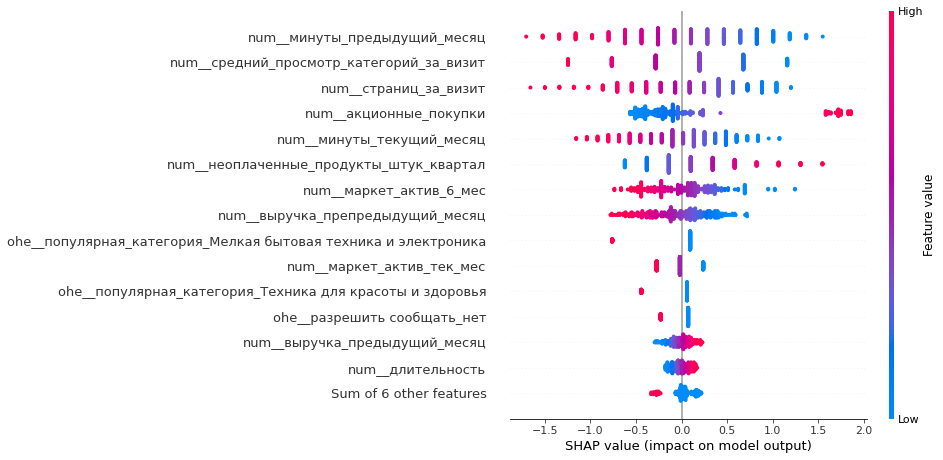

In [67]:
best_model = random.best_estimator_

if best_model is None:
    print("Лучшая модель не найдена в результатах RandomizedSearchCV.")
elif not isinstance(best_model, Pipeline):
    print("Лучшая модель не является Pipeline.")
else:
    if 'preprocessor' not in best_model.named_steps or 'model' not in best_model.named_steps:
        print("В пайплайне отсутствуют шаги 'preprocessor' или 'model'.")
    else:
        preprocessor = best_model.named_steps['preprocessor']
        model = best_model.named_steps['model']
        X_train_transformed = preprocessor.transform(X_train_model)
        X_test_transformed = preprocessor.transform(X_test_model)
        feature_names = preprocessor.get_feature_names_out()
        X_test_transformed_df = pd.DataFrame(X_test_transformed, columns=feature_names)
        explainer = shap.Explainer(model, X_train_transformed)
        shap_values = explainer(X_test_transformed_df)
        shap.plots.beeswarm(shap_values, max_display=15)

И сразу произведем оценку важности признаков.

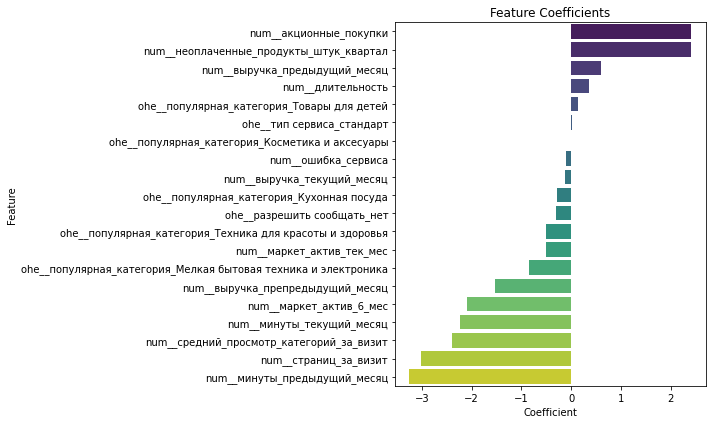

                                              Feature  Coefficient
0                              num__акционные_покупки       2.4205
1             num__неоплаченные_продукты_штук_квартал       2.4081
2                       num__выручка_предыдущий_месяц       0.6025
3                                   num__длительность       0.3506
4          ohe__популярная_категория_Товары для детей       0.1421
5                           ohe__тип сервиса_стандарт       0.0192
6     ohe__популярная_категория_Косметика и аксесуары       0.0000
7                                 num__ошибка_сервиса      -0.0981
8                          num__выручка_текущий_месяц      -0.1185
9           ohe__популярная_категория_Кухонная посуда      -0.2844
10                        ohe__разрешить сообщать_нет      -0.2999
11  ohe__популярная_категория_Техника для красоты ...      -0.5016
12                          num__маркет_актив_тек_мес      -0.5105
13  ohe__популярная_категория_Мелкая бытовая техни...      -0.

In [68]:
if best_model is None:
    print("Лучшая модель не найдена в результатах RandomizedSearchCV.")
else:
    if 'model' in best_model.named_steps:
        model = best_model.named_steps['model']

        if hasattr(model, 'feature_importances_'):
            feature_importances = model.feature_importances_
            preprocessor = best_model.named_steps['preprocessor']
            feature_names = preprocessor.get_feature_names_out() 
            feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
            feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)
            feature_importance_df['Importance'] = feature_importance_df['Importance'].round(4)
            
            print(feature_importance_df)

        elif hasattr(model, 'coef_'):
            coefficients = model.coef_[0]
            preprocessor = best_model.named_steps['preprocessor']
            feature_names = preprocessor.get_feature_names_out()
            feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
            feature_importance_df = feature_importance_df.sort_values(by='Coefficient', ascending=False).reset_index(drop=True)
            feature_importance_df['Coefficient'] = feature_importance_df['Coefficient'].round(4)
            plt.figure(figsize=(10, 6))
            sns.barplot(x='Coefficient', y='Feature', data=feature_importance_df, palette='viridis')
            plt.title('Feature Coefficients')
            plt.xlabel('Coefficient')
            plt.ylabel('Feature')
            plt.tight_layout()
            plt.show()

            print(feature_importance_df)
        else:
            print("Данная модель не имеет атрибутов feature_importances_ или coef_ для определения важности признаков.")
    else:
        print("В пайплайне отсутствует шаг 'model'.")

**Вывод:**

**Анализ представленных данных показывает, что некоторые факторы значительно повышают вероятность снижения покупательской активности, в то время как другие, наоборот, могут способствовать ее поддержанию. Вот основные выводы:**

**Факторы, повышающие вероятность снижения покупательской активности:**

**Акции (num__Акции_покупки):** большое количество покупок по акциям, вероятно, связано с временным интересом к продукции и может не приводить к устойчивой покупательской активности. Возможно, клиенты покупают только товары по скидке и не заинтересованы в покупках по полной цене.   
**Неоплаченные продукты (num__Неоплаченные_продукты_штук_квартал):** Наличие неоплаченных продуктов, очевидно, негативно влияет на дальнейшую покупательскую активность. Клиенты, у которых есть неоплаченные заказы, с меньшей вероятностью совершат новые покупки.   

**Факторы, умеренно влияющие на снижение покупательской активности:**

**Выручка за предыдущий месяц (num__выручка_за_предыдущий_месяц):** Зависимость неочевидна, но, возможно, высокая выручка в предыдущем месяце приводит к временному насыщению и, как следствие, к небольшому снижению покупательской активности в текущем месяце.   
**Длительность (num__Длительность):** небольшая положительная корреляция с длительностью может указывать на то, что клиенты, проводящие больше времени на сайте, могут не совершать покупки, а просто изучать информацию, потому что не находят нужный товар, не могут разобраться в функционале сайта или уходят из-за долгой загрузки.
Факторы, незначительно влияющие на снижение покупательской активности:

**Принадлежность к определенной категории товара и тип сервиса оказывают очень слабое влияние.
Факторы, снижающие вероятность снижения покупательской активности (поддерживающие или повышающие ее):**

**Ошибка сервиса (num__Ошибка_сервиса):** Возможно, исправление ошибок и предоставление качественного сервиса повышает лояльность клиентов и стимулирует их к продолжению покупок.   
**Выручка за текущий месяц (num__выручка_текущий_месяц):** Ожидается, что большая выручка за текущий месяц связана с высокой покупательской активностью.   
**Запрет на отправку сообщений (ohe__Разрешить отправку сообщений_нет):** пользователи, которые запрещают отправку сообщений, могут проявлять меньшую активность и реже совершать покупки.   
**Маркетинговая активность (num__Маркет_актив_тек_мес и num__Маркет_актив_6_мес):** Более интенсивная маркетинговая активность, особенно в долгосрочной перспективе, положительно влияет на поддержание покупательской активности.   
**Активность на сайте (num__минут_в_текущий_месяц, num__Средний_просмотр_категорий_за_визит, num__Страниц_за_визит, num__минут_в_предыдущий_месяц):** Клиенты, активно взаимодействующие с сайтом, проводят на нем больше времени, просматривают больше категорий и страниц, что в целом коррелирует с большей вероятностью совершения покупок.

**Ключевые выводы и рекомендации:**

**Обратите внимание на неоплаченные заказы:** разработайте стратегию по снижению количества неоплаченных заказов и мотивации клиентов к их оплате.   
**Оптимизировать маркетинговую стратегию:** сосредоточиться на долгосрочных маркетинговых кампаниях, направленных на поддержание постоянного интереса к продуктам.   
**Улучшить взаимодействие с сайтом:** обеспечить удобную навигацию, интересное содержание и полезную информацию, чтобы вовлечь клиентов и стимулировать их к совершению покупок.   
**Анализировать эффективность акционных предложений:** оценивать, приводят ли акционные предложения к устойчивой покупательской активности или просто привлекают клиентов только на время действия скидок.   
**Предоставлять качественный сервис:** быстро и эффективно решать проблемы клиентов, чтобы повысить их лояльность и стимулировать к продолжению покупок.   
**Эти выводы могут быть использованы отделом маркетинга для разработки стратегий, направленных на повышение покупательской активности и удержание клиентов. Важно проводить дальнейший анализ и эксперименты, путем анализа изменений популярности категорий, предоставление акций идругих мероприятий, например влияющих на лояльность клиентов к компании. Это поможет более точно использовать эти гипотезы и оптимизировать принимаемые решения.**

## Сегментация покупателей

Создадим столбец с вероятностью снижения пользовательсткой активности.

In [69]:
# Создание Series с индексами из X_test и вероятностями класса 1
probability_series = pd.Series(probabilities[:, 1], index=X_test.index)

# Присвоение Series в новый столбец 'вероятность'
X_test['вероятность'] = probability_series

X_test.sample(10)

,тип сервиса,разрешить сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,минуты_предыдущий_месяц,минуты_текущий_месяц,выручка_предыдущий_месяц,выручка_препредыдущий_месяц,выручка_текущий_месяц,id,вероятность
522,стандарт,да,4.1,5,626,0.15,Техника для красоты и здоровья,4,2,4,16,14,13,3753.0,5173.0,5111.5,215874,0.019014
1156,стандарт,да,4.9,5,384,0.28,Техника для красоты и здоровья,6,0,3,8,12,14,6531.0,5553.0,5813.4,216508,0.020683
382,премиум,да,3.8,4,1051,0.22,Косметика и аксесуары,2,4,3,7,5,11,5141.0,4607.0,5299.6,215734,0.940539
231,стандарт,нет,3.8,4,623,0.24,Домашний текстиль,1,7,5,4,13,10,5553.5,4769.0,6068.3,215583,0.930351
892,премиум,нет,4.2,3,452,0.25,Косметика и аксесуары,4,2,4,10,12,16,4573.0,5047.0,4292.2,216244,0.136319
631,стандарт,нет,4.2,4,160,0.17,Товары для детей,4,5,3,5,13,7,4468.0,5375.0,5384.5,215983,0.442570
261,стандарт,да,4.4,4,627,0.93,Техника для красоты и здоровья,3,7,3,4,11,12,3563.0,4457.0,4700.5,215613,0.964277
997,стандарт,нет,5.5,4,341,0.16,Косметика и аксесуары,4,1,2,10,13,11,5230.5,5394.0,5218.8,216349,0.050911
427,премиум,да,4.3,3,242,0.16,Техника для красоты и здоровья,4,5,2,11,19,15,5949.0,5142.0,5379.6,215779,0.053035
361,стандарт,да,4.6,5,293,0.24,Товары для детей,1,3,3,3,12,14,4821.0,4872.0,5221.4,215713,0.750323


Как мы уже увидели ранее - прибыль практически не влияет на снижение покупательской активности.

Объединим вероятность и прибыль.

Сохраним 4 знака после запятой в столбце 'вероятность'.

In [70]:
segment_tes = X_test.merge(money, on='id', how='left')
segment_tes['вероятность'] = segment_tes['вероятность'].apply(lambda x: '{:.4f}'.format(x))
segment_tes.sample(15)

,тип сервиса,разрешить сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,минуты_предыдущий_месяц,минуты_текущий_месяц,выручка_предыдущий_месяц,выручка_препредыдущий_месяц,выручка_текущий_месяц,id,вероятность,прибыль
313,премиум,нет,4.2,3,452,0.25,Косметика и аксесуары,4,2,4,10,12,16,4573.0,5047.0,4292.2,216244,0.1363,5.31
259,стандарт,да,3.4,4,842,0.89,Техника для красоты и здоровья,2,8,8,3,14,10,3526.0,4610.0,4286.5,215499,0.9821,4.71
2,стандарт,да,5.0,4,698,0.27,Кухонная посуда,4,3,2,8,15,6,5353.5,4470.0,6249.2,216097,0.4105,3.82
161,стандарт,да,3.9,3,519,0.40,Товары для детей,1,8,3,5,14,13,4237.0,4673.0,4617.9,215611,0.9591,2.29
192,стандарт,нет,5.1,5,272,0.28,Товары для детей,5,4,3,13,8,15,4693.0,4736.0,4860.7,216020,0.1392,4.74
68,премиум,да,2.4,5,460,0.22,Косметика и аксесуары,1,6,8,4,10,11,5361.0,4260.0,6111.1,215719,0.9744,5.28
239,стандарт,да,5.6,4,342,0.94,Кухонная посуда,2,7,5,8,14,19,4930.0,5269.0,4766.2,216564,0.7026,5.58
206,премиум,да,2.4,3,666,0.98,Кухонная посуда,3,5,1,2,10,12,5295.0,4434.0,5029.8,215408,0.9930,3.68
42,стандарт,да,3.5,3,1012,0.40,Техника для красоты и здоровья,4,5,3,5,11,9,3715.0,4511.0,4638.0,215661,0.8540,2.80
130,стандарт,да,4.3,4,661,0.17,Мелкая бытовая техника и электроника,5,5,7,6,16,19,5445.0,4959.0,5996.2,216386,0.0537,4.37


Выберем как сегмент людей, которые приносят бОльшую часть денег и имеют риск снижения покупательской активности. Думаю для компании самое важное своевременно отследить таких клиентов.

In [71]:
segment_tes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 324 entries, 0 to 323
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   тип сервиса                          324 non-null    object 
 1   разрешить сообщать                   324 non-null    object 
 2   маркет_актив_6_мес                   324 non-null    float64
 3   маркет_актив_тек_мес                 324 non-null    int64  
 4   длительность                         324 non-null    int64  
 5   акционные_покупки                    324 non-null    float64
 6   популярная_категория                 324 non-null    object 
 7   средний_просмотр_категорий_за_визит  324 non-null    int64  
 8   неоплаченные_продукты_штук_квартал   324 non-null    int64  
 9   ошибка_сервиса                       324 non-null    int64  
 10  страниц_за_визит                     324 non-null    int64  
 11  минуты_предыдущий_месяц         

Добавим столбец с вероятностью.

In [72]:
segment_tes['вероятность'] = pd.to_numeric(segment_tes['вероятность'], errors='coerce').astype('float64')

# Установка опций отображения pandas
pd.options.display.float_format = '{:.4f}'.format

Выведем информацию по Прибыли еще раз. Ранее, мы уже видели на боксплоте, что основная масса прибыли приходится от 3.3 до 4.7, а так же есть выбросы - т.е. неоднородность клиентов, от неособо прибыльных до очень прибыльных.

In [73]:
segment_tes['прибыль'].describe()

count   324.0000
mean      4.0119
std       1.0262
min       0.8600
25%       3.3875
50%       3.9850
75%       4.6575
max       7.4300
Name: прибыль, dtype: float64

Итак, выбираем сегмент покупателей, которые приносят прибыль выше средней, т.е. > 4 и при этом есть большая вероятность риска, что их покупательская способность будет снижена.

Считаю, что именно такие покупатели должны волновать руководство в первую очередь. Понятно, что есть клиенты постоянные, которые берут все время, но дешево и мало, но прибыль компании тоже кто-то должен приносить.

In [74]:
target_clients = segment_tes[(segment_tes['вероятность']> 0.7)&(segment_tes['прибыль'] > 4)]
target_clients.head()

,тип сервиса,разрешить сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,минуты_предыдущий_месяц,минуты_текущий_месяц,выручка_предыдущий_месяц,выручка_препредыдущий_месяц,выручка_текущий_месяц,id,вероятность,прибыль
1,стандарт,да,3.5000,4,685,0.8900,Техника для красоты и здоровья,2,9,3,3,12,10,3441.0000,4429.0000,3520.3000,215698,0.9914,5.1000
9,стандарт,нет,4.0000,3,336,0.9000,Домашний текстиль,2,7,2,6,10,9,4456.0000,4537.0000,5444.0000,215428,0.9885,4.2500
15,стандарт,да,3.4000,5,706,0.2200,Домашний текстиль,2,3,8,4,12,6,5876.0000,4805.0000,6830.2000,215396,0.8730,5.0900
16,премиум,да,4.1000,5,377,0.2400,Товары для детей,3,2,2,3,9,9,3914.0000,4991.0000,3875.0000,215417,0.7329,4.5000
19,премиум,да,3.6000,5,873,0.3900,Товары для детей,3,2,2,5,10,10,3716.0000,4691.0000,4600.0000,215715,0.8055,4.8700


Посмотрим сколько клиентов у нас осталось с таким фильтром сегмента.

In [75]:
print(len(target_clients))

56


Посмотрим сколько это % от общего количества клиентов.

In [76]:
print(len(target_clients['тип сервиса'])/len(segment_tes['тип сервиса'])*100)

17.28395061728395


Выбранный сегмент занимает 17% от общего количества покупателей.

Посмотрим сколько прибыли в % соотношении они приносят от общей прибыли по всем клиентам.

In [77]:
print((target_clients['прибыль'].sum())/(segment_tes['прибыль'].sum())*100)

20.621451540935173


Выбранный сегмент приносит около 21% прибыли от общего количества прибыли в компании за последние 3 месяца.

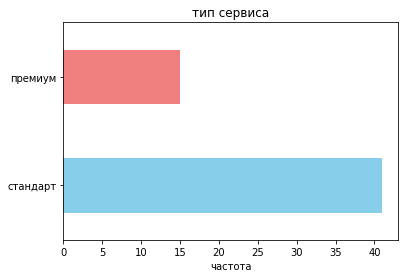

In [78]:
ax = target_clients['тип сервиса'].value_counts().plot.barh()
colors = ['skyblue', 'lightcoral', 'lightgreen']
ax.patches[0].set_facecolor(colors[0])
ax.patches[1].set_facecolor(colors[1])
plt.title('тип сервиса')
plt.xlabel('частота')
plt.show()

In [79]:
print(target_clients['тип сервиса'].value_counts(normalize=True) * 100)

стандарт   73.2143
премиум    26.7857
Name: тип сервиса, dtype: float64


27% выбранных клиентов используют премиум сервис, 73% используют стандарт.

Посмотрим сколько акционных покупок происходит в данном сегменте.

In [80]:
target_clients['акционные_покупки'].describe()

count   56.0000
mean     0.5082
std      0.3101
min      0.2100
25%      0.2700
50%      0.3250
75%      0.9000
max      0.9900
Name: акционные_покупки, dtype: float64

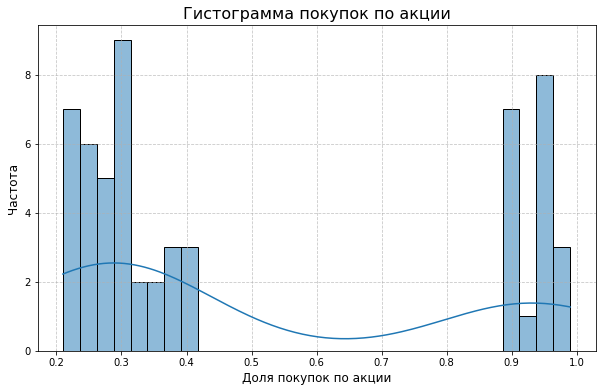

In [81]:
plt.figure(figsize=(10, 6)) # Adjust figure size for better visualization

sns.histplot(target_clients['акционные_покупки'], kde=True, bins=30) #Added KDE for smoother visualization. Adjust bins as needed

plt.title('Гистограмма покупок по акции', fontsize=16) # Increased title font size
plt.xlabel('Доля покупок по акции', fontsize=12) # Improved label, increased font size
plt.ylabel('Частота', fontsize=12) # Improved label, increased font size
plt.grid(True, linestyle='--', alpha=0.7)

Доля акционных покупок в выбранном сегменте занимает от 21% до 99%. Получается есть клиенты, которые покупают только по акции.

Теперь посмотрим сколько неоплаченных продуктов за квартал лежит в корзине у выбранного сегмента

In [82]:
target_clients['неоплаченные_продукты_штук_квартал'].describe()

count   56.0000
mean     4.4286
std      2.4185
min      0.0000
25%      3.0000
50%      4.0000
75%      6.0000
max      9.0000
Name: неоплаченные_продукты_штук_квартал, dtype: float64

Посмотрим наглядно на графике.

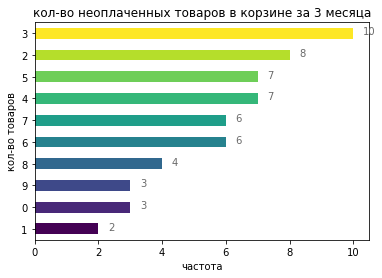

In [83]:
ax = target_clients['неоплаченные_продукты_штук_квартал'].value_counts().sort_values().plot.barh(color=plt.cm.viridis(np.linspace(0, 1, target_clients['неоплаченные_продукты_штук_квартал'].nunique()))) # Используем viridis colormap

plt.title('кол-во неоплаченных товаров в корзине за 3 месяца')
plt.xlabel('частота')
plt.ylabel('кол-во товаров')

# Добавляем подписи значений к столбцам
for i in ax.patches:
    ax.text(i.get_width()+.3, i.get_y()+.20,
            str(round((i.get_width()), 2)),
            fontsize=10, color='dimgrey')

plt.show()

В среднем на данный сегмент приходится 4-5 неоплаченных товаров в корзине за квартал. Максимально, у кого-то доходит до 9 шт. товара. То есть мы имеем потенциального покупателя некоторых категорий товара, но судя по ожиданию акций, которое мы описали пунктом выше, данный сегмент ждет акции и часть людей, не готовы категорически покупать товар без специальных предложений.

Если в среднем 4-5 имеется неоплаченных товаров в корзине за квартал, то интересно посмотреть, сколько в среднем категорий товаров просматривает выбранный нами сегмент.

In [84]:
target_clients['средний_просмотр_категорий_за_визит'].describe()

count   56.0000
mean     2.2500
std      0.9582
min      1.0000
25%      2.0000
50%      2.0000
75%      3.0000
max      6.0000
Name: средний_просмотр_категорий_за_визит, dtype: float64

In [85]:
target_clients.groupby('средний_просмотр_категорий_за_визит').size().reset_index(name='Количество').sort_values(by='Количество', ascending=False)


,средний_просмотр_категорий_за_визит,Количество
1,2,26
2,3,15
0,1,11
3,4,3
4,6,1


Чаще всего просматривают 2-3 категории. Некоторые иногда просматривают даже 6 категорий товаров.

Теперь необходимо понять, какие категории у нашего сегмента наиболее просматриваемые.

In [86]:
target_clients['популярная_категория'].describe()

count                   56
unique                   6
top       Товары для детей
freq                    20
Name: популярная_категория, dtype: object

In [87]:
target_clients.groupby('популярная_категория').size().reset_index(name='Количество').sort_values(by='Количество', ascending=False)

,популярная_категория,Количество
5,Товары для детей,20
1,Косметика и аксесуары,11
2,Кухонная посуда,10
0,Домашний текстиль,8
4,Техника для красоты и здоровья,5
3,Мелкая бытовая техника и электроника,2


Самые популярные категории, среди отобранных нами покупателей: на первом месте - Товары для детей, на втором месте - Косметика и аксесуары, на третьем месте - Кухонная посуда, на четвертом месте - Домашний текстиль	, на пятом месте - Техника для красоты и здоровья, на шестом месте - Мелкая бытовая техника и электроника.

**Вывод**

Мы взяли сегмент покупателей, которые приносят прибыль выше средней, т.е. > 4 и при этом есть большая вероятность риска, что их покупательская способность будет снижена.

Считаю, что именно такие покупатели должны волновать руководство в первую очередь. Понятно, что есть клиенты постоянные, которые берут все время, но дешево и мало, но прибыль компании тоже кто-то должен приносить.

В этот сегмент покупателей вошли 56 человек, а именно чуть больше 17% от общего количество покупателей интернет-магазина «В один клик». Каждый месяц в среднем они приносят прибыль около 21% от общей - это совсем не мало.   
Около 73% этих клиентов используют стандартный сервис и около 27% используют премиум.   
Доля акционных покупок в выбранном сегменте занимает от 21% до 99%. Получается есть клиенты, которые покупают только по акции.   
Так же кол-во неоплаченных товаров в корзине за 3 месяца рознится от 0 шт. до 9 шт. В среднем 4-5 шт.   
За 1 визит сайта эти покупатели просматривают от 1 до 6 категорий, в среднем 2-3 категории. Можно сделать вывод, что часть пользователей, просматривающих большее количество категорий по отношению к среднему просто смотрит, что выгодно можно купить - по акции.   
Поэтому нам важно было понять - а какие же категории самые популярные среди пользователей. Мы получили, что по популярности просмотров на первом месте - Товары для детей, на втором месте - Косметика и аксесуары, на третьем месте - Кухонная посуда, на четвертом месте - Домашний текстиль	, на пятом месте - Техника для красоты и здоровья, на шестом месте - Мелкая бытовая техника и электроника.   
Соответственно, отделу маркетинга, как первый приоритет, можно рассмотреть постановку задачи на анализ выгодных для магазина акций и приятных для покупателей по категориям из этого списка. Скорее всего, тогда мы получим более высокую долю прибыли от общей по этому сегменту за месяц, просмотр больших категорий и выкуп части или полной корзины не оплаченных товаров, которая, как мы понимаем, ожидает появление приятной для покупателя цены.

**Общий вывод по проекту**

**1. Загрузка данных:**

Четыре набора данных успешно загружены и готовы к анализу:

Данные о покупательском поведении (market_file): содержат подробную информацию о действиях клиентов, типе используемого сервиса и другие характеристики покупательского поведения.   
Данные о выручке (market_money): содержат информацию о выручке за различные периоды времени.   
Данные о времени пребывания на сайте (market_time): содержат информацию о времени, проведенном пользователями на сайте, за различные периоды.   
Данные о прибыли (Money): Содержат информацию о прибыли.   
Все наборы данных соответствуют описанию и подготовлены для дальнейшей обработки и анализа.   

**2. Предобработка данных:**

Загружены и проверены следующие наборы данных: «market_file», «market_money», «market_time» и «Money». Ключевая информация о каждом наборе:

market_file: 1300 записей, 13 столбцов (информация о клиентах).   
market_money: 3900 записей, 3 столбца (данные о выручке).   
market_time: 2600 записей, 3 столбца (данные о времени пребывания на сайте).   
Деньги: 1300 записей, 2 столбца (данные о прибыли).   
Все наборы данных содержат полные значения и потенциально могут быть объединены по столбцу «id», что позволит провести комплексный и всесторонний анализ.   

**3. Исследовательский анализ данных:**

Обзор ключевых характеристик клиентов и их активности:

Покупательская активность: большинство клиентов сохраняют стабильный уровень, хотя у значительной части наблюдается снижение активности.   
Тип сервиса: Стандартный тип сервиса наиболее популярен.   
Рассылки: Клиенты в основном согласны получать маркетинговые рассылки.   
Продолжительность пребывания на сайте: обычно от 400 до 800 дней.   
Акции при покупке: для большинства клиентов 17-30% покупок совершается по акциям. Есть группа клиентов, которые почти все покупают по акциям.   
Неоплаченные товары: чаще всего в корзине остается 1-2 неоплаченных товара за 3 месяца.   
Сбои на сайте: клиенты в основном сталкиваются с 4 сбоями, что указывает на то, что сбои являются распространенным явлением.   
Просмотры страниц: за один визит клиенты обычно просматривают от 4 до 11 страниц.

Маркетинговые коммуникации и активность:   
Количество коммуникаций: в основном от 3,7 до 4,9. Маркетинговая активность в текущем месяце и за последние 6 месяцев чаще всего выражается примерно в 4 коммуникациях.   

Популярные категории и просмотры:   
Популярные категории: товары для детей, домашний текстиль, косметика и аксессуары, техника для красоты и здоровья, мелкая бытовая техника и электроника, кухонная посуда.   
Среднее количество просмотров за визит: Чаще всего 3 категории.   
Финансовые показатели:   

Выручка: Наблюдается положительная динамика в последние месяцы.   
Время на сайте: Незначительно сократилось в текущем месяце.   
Прибыль: основная часть значений прибыли находится в диапазоне от 3,3 до 4,7. Выбросы указывают на наличие клиентов с очень высокой и низкой прибылью.   
Критерий отбора данных для дальнейшего анализа:   

Отобраны клиенты, совершавшие покупки в течение последних 3 месяцев, чтобы сосредоточиться на активной клиентской базе.

**4. Объединение таблиц:**

Объединение таблиц прошло успешно. Итоговая таблица прошла проверку на корректность данных: она имеет правильный размер, типы данных, не содержит пропущенных значений и дубликатов, что гарантирует надежную основу для дальнейшего анализа.   

**5. Корреляционный анализ:**

Цель анализа - выявление факторов, влияющих на покупательскую активность.   

Нулевая корреляция: столбцы «Разрешить сообщать» и «Маркет_актив_тек_мес» не связаны с покупательской активностью.   
Слабая положительная корреляция: «Тип сервиса», «Продолжительность», «Популярная_категория», «Ошибка_сервиса», «Выручка_за_предыдущий_месяц», «Выручка_за_предыдущий_месяц», «Выручка_за_текущий_месяц» оказывают незначительное влияние на покупательскую активность.   
Умеренная положительная корреляция: «Маркет_актив6мес», «Акции_покупки», «Средний_просмотр_категорий_за_визит», «Неоплаченные_продукты_штук_квартал», «Страниц_за_визит», «минуты_предыдущий_месяц», «минуты_текущий_месяц» демонстрируют заметное влияние на покупательскую активность.   
Важно помнить, что корреляция не означает причинно-следственную связь, и требуются дополнительные исследования для подтверждения значимости этих факторов.   

**6. Использование пайплайнов (модель LogisticRegression):**

На основе представленных данных можно сделать следующие выводы:

Лучшая модель: лучшей моделью является LogisticRegression с параметрами C=3, penalty='l1', random_state=42, и solver='liblinear'. Эта модель была выбрана, вероятно, на основе кросс-валидации или другого метода выбора модели в конвейере model.

Эффективность на обучающей выборке: Модель демонстрирует хорошие результаты на обучающей выборке:

Roc_auc: 0.899087112415257. Это указывает на хорошую способность модели различать положительные и отрицательные классы. Accuracy: 0.8683055775839282. Модель правильно классифицирует примерно 86.8% образцов. Recall: 0.7744539059607553Модель правильно идентифицирует примерно 77,4% всех положительных образцов. Это важно, если пропуск положительных случаев критичен. Обобщающая способность (тестовая выборка): модель сохраняет хорошую производительность на тестовой выборке:

Метрика ROC-AUC для класса 1 на тестовой выборке: 0.9014Это свидетельствует о хорошей обобщающей способности модели и её способности различать классы на новых, ранее не встречавшихся данных. Значение ROC-AUC даже немного выше, чем на обучающей выборке, что может быть результатом случайности, но в целом говорит о том, что модель не переобучилась.

Общий вывод:

Подобранная модель логистической регрессии с регуляризацией L1 показывает хорошие результаты как на обучающих, так и на тестовых данных. Параметры регуляризации (C=3 и penalty='l1') были выбраны, вероятно, для предотвращения переобучения и улучшения обобщающей способности модели. Модель хорошо различает классы (высокий ROC-AUC) и имеет приемлемую точность и полноту.  

**7.  Анализ важности признаков:**

Анализ представленных данных показывает, что некоторые факторы значительно повышают вероятность снижения покупательской активности, в то время как другие, наоборот, могут способствовать ее поддержанию. Вот основные выводы:

Факторы, повышающие вероятность снижения покупательской активности:

Акции (num__Акции_покупки): большое количество покупок по акциям, вероятно, связано с временным интересом к продукции и может не приводить к устойчивой покупательской активности. Возможно, клиенты покупают только товары по скидке и не заинтересованы в покупках по полной цене.
Неоплаченные продукты (num__Неоплаченные_продукты_штук_квартал): Наличие неоплаченных продуктов, очевидно, негативно влияет на дальнейшую покупательскую активность. Клиенты, у которых есть неоплаченные заказы, с меньшей вероятностью совершат новые покупки.

Факторы, умеренно влияющие на снижение покупательской активности:

Выручка за предыдущий месяц (num__выручка_за_предыдущий_месяц): Зависимость неочевидна, но, возможно, высокая выручка в предыдущем месяце приводит к временному насыщению и, как следствие, к небольшому снижению покупательской активности в текущем месяце.
Длительность (num__Длительность): небольшая положительная корреляция с длительностью может указывать на то, что клиенты, проводящие больше времени на сайте, могут не совершать покупки, а просто изучать информацию, потому что не находят нужный товар, не могут разобраться в функционале сайта или уходят из-за долгой загрузки. Факторы, незначительно влияющие на снижение покупательской активности:

Принадлежность к определенной категории товара и тип сервиса оказывают очень слабое влияние. Факторы, снижающие вероятность снижения покупательской активности (поддерживающие или повышающие ее):

Ошибка сервиса (num__Ошибка_сервиса): Возможно, исправление ошибок и предоставление качественного сервиса повышает лояльность клиентов и стимулирует их к продолжению покупок.
Выручка за текущий месяц (num__выручка_текущий_месяц): Ожидается, что большая выручка за текущий месяц связана с высокой покупательской активностью.
Запрет на отправку сообщений (ohe__Разрешить отправку сообщений_нет): пользователи, которые запрещают отправку сообщений, могут проявлять меньшую активность и реже совершать покупки.
Маркетинговая активность (num__Маркет_актив_тек_мес и num__Маркет_актив6мес): Более интенсивная маркетинговая активность, особенно в долгосрочной перспективе, положительно влияет на поддержание покупательской активности.
Активность на сайте (num__минутвтекущий_месяц, num__Средний_просмотр_категорий_за_визит, num__Страниц_за_визит, num__минутвпредыдущий_месяц): Клиенты, активно взаимодействующие с сайтом, проводят на нем больше времени, просматривают больше категорий и страниц, что в целом коррелирует с большей вероятностью совершения покупок.

Ключевые выводы и рекомендации:

Обратите внимание на неоплаченные заказы: разработайте стратегию по снижению количества неоплаченных заказов и мотивации клиентов к их оплате.
Оптимизировать маркетинговую стратегию: сосредоточиться на долгосрочных маркетинговых кампаниях, направленных на поддержание постоянного интереса к продуктам.
Улучшить взаимодействие с сайтом: обеспечить удобную навигацию, интересное содержание и полезную информацию, чтобы вовлечь клиентов и стимулировать их к совершению покупок.
Анализировать эффективность акционных предложений: оценивать, приводят ли акционные предложения к устойчивой покупательской активности или просто привлекают клиентов только на время действия скидок.
Предоставлять качественный сервис: быстро и эффективно решать проблемы клиентов, чтобы повысить их лояльность и стимулировать к продолжению покупок.
Эти выводы могут быть использованы отделом маркетинга для разработки стратегий, направленных на повышение покупательской активности и удержание клиентов. Важно проводить дальнейший анализ и эксперименты, путем анализа изменений популярности категорий, предоставление акций идругих мероприятий, например влияющих на лояльность клиентов к компании. Это поможет более точно использовать эти гипотезы и оптимизировать принимаемые решения.

**8.  Сегментация покупателей:**

Сегмент прибыльных и рискованных клиентов:

Особое внимание следует уделить сегменту клиентов, приносящих прибыль выше средней (более 4 единиц), но имеющих высокий риск снижения покупательской активности. Эти клиенты критически важны для компании, в отличие от постоянных, но малоприбыльных покупателей.   

Характеристика сегмента (56 клиентов, 17% от общего числа покупателей):

Приносят около 21% общей месячной прибыли.   
73% используют стандартный сервис, 27% - премиум.   
Доля покупок по акциям варьируется от 21% до 99%, включая клиентов, которые покупают только по акциям.   
В среднем 4-5 неоплаченных товаров в корзине за 3 месяца (диапазон 0-9).   
Просматривают 2-3 категории за визит (диапазон 1-6), предполагая, что клиенты, просматривающие больше категорий, ищут выгодные предложения (акции).   
Популярные категории среди сегмента:   

1.Товары для детей   
2.Косметика и аксессуары   
3.Кухонная посуда   
4.Домашний текстиль   
5.Техника для красоты и здоровья   
6.Мелкая бытовая техника и электроника   
7.Рекомендации:   

Отделу маркетинга следует уделить приоритетное внимание анализу и разработке выгодных для магазина и привлекательных для клиентов акций по вышеуказанным категориям. Это позволит увеличить долю прибыли от данного сегмента, стимулировать просмотр большего количества категорий и повысить выкуп неоплаченных товаров в корзинах, что указывает на ожидание более выгодных цен.   